# Imports

In [4]:
import numpy as np
import pandas as pd
import time
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pylab as plt
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 45)


In [2]:
N = 600

t = np.arange(0, N, 1).reshape(-1,1)
t = np.array([t[i] + np.random.rand(1)/4 for i in range(len(t))])
t = np.array([t[i] - np.random.rand(1)/7 for i in range(len(t))])
t = np.array(np.round(t, 2))

x1 = np.round((np.random.random(N) * 5).reshape(-1,1), 2)
x2 = np.round((np.random.random(N) * 5).reshape(-1,1), 2)
x3 = np.round((np.random.random(N) * 5).reshape(-1,1), 2)

n = np.round((np.random.random(N) * 2).reshape(-1,1), 2)

y = np.array([((np.log(np.abs(2 + x1[t])) - x2[t-1]**2) + 0.02*x3[t-3]*np.exp(x1[t-1])) for t in range(len(t))])
y = np.round(y+n, 2)

In [3]:
dataset = pd.DataFrame(np.concatenate((t, x1, x2, x3, y), axis=1), 
                       columns=['t', 'x1', 'x2', 'x3', 'y'])

deltaT = np.array([(dataset.t[i + 1] - dataset.t[i]) for i in range(len(dataset)-1)])
deltaT = np.concatenate((np.array([0]), deltaT))

dataset.insert(1, '∆t', deltaT)
dataset.head(10)

,t,∆t,x1,x2,x3,y
0,0.07,0.00,1.73,4.60,3.99,5.59
1,0.99,0.92,1.07,3.50,3.60,-17.78
2,2.12,1.13,1.43,3.41,1.31,-10.03
3,3.15,1.03,2.74,1.60,4.48,-8.19
4,4.17,1.02,3.15,3.90,3.50,0.50
5,4.91,0.74,2.34,1.03,0.61,-12.54
6,6.09,1.18,1.18,2.13,3.31,2.33
7,7.13,1.04,0.82,0.28,2.31,-3.12
8,8.16,1.03,4.15,3.54,2.20,1.99
9,9.11,0.95,3.77,3.38,2.23,-5.72


In [70]:
trainset = pd.DataFrame(create_a_row)
trainset

,t(0),∆t(0),x1(0),x2(0),x3(0),t(1),∆t(1),x1(1),x2(1),x3(1),t(2),∆t(2),x1(2),x2(2),x3(2),t(3),∆t(3),x1(3),x2(3),x3(3)
0,0.16,0.00,2.20,1.52,0.29,1.10,0.94,3.03,4.77,3.53,2.17,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80
1,1.10,0.94,3.03,4.77,3.53,2.17,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78
2,2.17,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31
3,3.14,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31,6.00,0.95,2.64,0.41,3.81
4,4.18,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31,6.00,0.95,2.64,0.41,3.81,7.02,1.02,1.14,1.54,4.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,591.96,1.02,4.35,3.17,0.54,593.16,1.20,4.00,4.08,0.45,594.02,0.86,3.66,3.51,3.27,594.90,0.88,3.88,1.35,0.07
593,593.16,1.20,4.00,4.08,0.45,594.02,0.86,3.66,3.51,3.27,594.90,0.88,3.88,1.35,0.07,596.03,1.13,2.61,2.22,4.03
594,594.02,0.86,3.66,3.51,3.27,594.90,0.88,3.88,1.35,0.07,596.03,1.13,2.61,2.22,4.03,597.13,1.10,0.57,1.65,4.87
595,594.90,0.88,3.88,1.35,0.07,596.03,1.13,2.61,2.22,4.03,597.13,1.10,0.57,1.65,4.87,598.06,0.93,0.52,2.26,0.13


In [132]:
window_size = 4
create_a_row = reshape_to_window(dataset,window_size,include_target=True)
create_a_row

None        t(0)  ∆t(0)  x1(0)  x2(0)  x3(0)   y(0)    t(1)  ∆t(1)  x1(1)  x2(1)  \
0      0.07   0.00   1.73   4.60   3.99   5.59    0.99   0.92   1.07   3.50   
1      0.99   0.92   1.07   3.50   3.60 -17.78    2.12   1.13   1.43   3.41   
2      2.12   1.13   1.43   3.41   1.31 -10.03    3.15   1.03   2.74   1.60   
3      3.15   1.03   2.74   1.60   4.48  -8.19    4.17   1.02   3.15   3.90   
4      4.17   1.02   3.15   3.90   3.50   0.50    4.91   0.74   2.34   1.03   
..      ...    ...    ...    ...    ...    ...     ...    ...    ...    ...   
592  591.93   0.99   2.51   2.28   4.30   0.85  593.06   1.13   4.47   4.88   
593  593.06   1.13   4.47   4.88   0.63  -2.48  594.14   1.08   4.65   3.15   
594  594.14   1.08   4.65   3.15   2.02 -19.69  595.02   0.88   4.63   2.77   
595  595.02   0.88   4.63   2.77   1.60   2.45  596.16   1.14   4.31   2.75   
596  596.16   1.14   4.31   2.75   0.43  -2.58  597.06   0.90   0.75   1.53   

     ...  ∆t(2)  x1(2)  x2(2)  x3(2)   y(2)   

,t(0),∆t(0),x1(0),x2(0),x3(0),y(0),t(1),∆t(1),x1(1),x2(1),...,∆t(2),x1(2),x2(2),x3(2),y(2),t(3),∆t(3),x1(3),x2(3),x3(3)
0,0.07,0.00,1.73,4.60,3.99,5.59,0.99,0.92,1.07,3.50,...,1.13,1.43,3.41,1.31,-10.03,3.15,1.03,2.74,1.60,4.48
1,0.99,0.92,1.07,3.50,3.60,-17.78,2.12,1.13,1.43,3.41,...,1.03,2.74,1.60,4.48,-8.19,4.17,1.02,3.15,3.90,3.50
2,2.12,1.13,1.43,3.41,1.31,-10.03,3.15,1.03,2.74,1.60,...,1.02,3.15,3.90,3.50,0.50,4.91,0.74,2.34,1.03,0.61
3,3.15,1.03,2.74,1.60,4.48,-8.19,4.17,1.02,3.15,3.90,...,0.74,2.34,1.03,0.61,-12.54,6.09,1.18,1.18,2.13,3.31
4,4.17,1.02,3.15,3.90,3.50,0.50,4.91,0.74,2.34,1.03,...,1.18,1.18,2.13,3.31,2.33,7.13,1.04,0.82,0.28,2.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,591.93,0.99,2.51,2.28,4.30,0.85,593.06,1.13,4.47,4.88,...,1.08,4.65,3.15,2.02,-19.69,595.02,0.88,4.63,2.77,1.60
593,593.06,1.13,4.47,4.88,0.63,-2.48,594.14,1.08,4.65,3.15,...,0.88,4.63,2.77,1.60,2.45,596.16,1.14,4.31,2.75,0.43
594,594.14,1.08,4.65,3.15,2.02,-19.69,595.02,0.88,4.63,2.77,...,1.14,4.31,2.75,0.43,-2.58,597.06,0.90,0.75,1.53,2.81
595,595.02,0.88,4.63,2.77,1.60,2.45,596.16,1.14,4.31,2.75,...,0.90,0.75,1.53,2.81,-2.38,598.12,1.06,0.13,0.21,4.99


In [10]:
create_target_value = dataset["y"][window_size-1:].values

In [11]:
trainset["target_y"] = create_target_value

In [12]:
trainset.loc[0:500,:]

,t(0),∆t(0),x1(0),x2(0),x3(0),t(1),∆t(1),x1(1),x2(1),x3(1),...,∆t(2),x1(2),x2(2),x3(2),t(3),∆t(3),x1(3),x2(3),x3(3),target_y
0,0.16,0.00,2.20,1.52,0.29,1.10,0.94,3.03,4.77,3.53,...,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80,-4.31
1,1.10,0.94,3.03,4.77,3.53,2.17,1.07,0.24,2.39,0.02,...,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78,-6.75
2,2.17,1.07,0.24,2.39,0.02,3.14,0.97,0.75,3.24,4.80,...,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31,-16.80
3,3.14,0.97,0.75,3.24,4.80,4.18,1.04,3.85,4.26,0.78,...,0.87,0.10,4.76,1.31,6.00,0.95,2.64,0.41,3.81,-19.77
4,4.18,1.04,3.85,4.26,0.78,5.05,0.87,0.10,4.76,1.31,...,0.95,2.64,0.41,3.81,7.02,1.02,1.14,1.54,4.88,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496.02,1.04,3.51,0.20,0.80,497.01,0.99,0.11,2.91,1.95,...,1.21,3.15,1.45,2.75,498.93,0.71,1.41,3.03,2.27,-0.14
497,497.01,0.99,0.11,2.91,1.95,498.22,1.21,3.15,1.45,2.75,...,0.71,1.41,3.03,2.27,500.11,1.18,2.80,1.88,4.14,-6.10
498,498.22,1.21,3.15,1.45,2.75,498.93,0.71,1.41,3.03,2.27,...,1.18,2.80,1.88,4.14,501.15,1.04,3.55,3.49,2.76,-0.64
499,498.93,0.71,1.41,3.03,2.27,500.11,1.18,2.80,1.88,4.14,...,1.04,3.55,3.49,2.76,502.08,0.93,1.20,0.54,4.98,-7.79


In [13]:
ml_trainset = trainset.loc[0:500,:]
ml_testset = trainset.loc[501:,:]

In [16]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(ml_trainset.iloc[:,:-1], ml_trainset.iloc[:,-1])

t0 = time.time()
lr_y = ml_testset['target_y'].values
lr_y_fit = lr_model.predict(ml_trainset.iloc[:,:-1])
lr_y_pred = lr_model.predict(ml_testset.iloc[:,:-1])
tF = time.time()

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.2f' % lr_rmse)
print('Time to train = %.2f seconds' % (tF - t0))

RMSE = 2.79
Time to train = 0.00 seconds


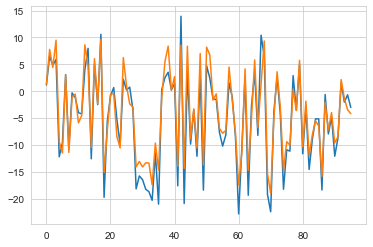

In [19]:
from matplotlib import pyplot as plt
plt.plot([i for i in range(len(lr_y))],lr_y,label = "Actual y")
plt.plot([i for i in range(len(lr_y))],lr_y_pred,label = "Predicted y")
plt.show()

# Helper functions for reshaping

In [5]:
def reshape_to_window(dataset,window_size,target_value = "y", include_target = False,drop_columns = None): #hourly scope
    columns_size = dataset.shape[1]
    create_a_row = []
    columns_to_save_after_proceed = None
    target_values = dataset.iloc[window_size-1:,][target_value].values
    if(drop_columns!=None):
        columns_to_save_after_proceed = dataset.iloc[window_size-1:,][drop_columns]
        columns_to_save_after_proceed = columns_to_save_after_proceed.reset_index(drop = True)
        dataset = dataset.drop(columns = drop_columns,axis = 1)
    for r in (range(dataset.shape[0]-window_size+1)):
        create_a_row.append({})
        for row in range(window_size):
            for col in dataset.columns:
                if(col==target_value and row == window_size-1):
                    continue
                elif(col == target_value and include_target == False):
                    continue
                else:
                    create_a_row[r][f"{col}({row})"] = dataset[col][dataset[col].index[row+r]]
    
    create_a_row = pd.DataFrame(create_a_row)
    result = create_a_row
    #print(len(target_values))
    result[target_value] = target_values 
    if(drop_columns!=None):
        result = pd.concat([columns_to_save_after_proceed,create_a_row],axis = 1)
    return result

def reshape_whole_table(dataset,window_size,target_value = "y", include_target = False,drop_columns = None):
    xs = list(set(dataset["x"]))
    ys = list(set(dataset["y"]))
    
    result = pd.DataFrame()
    
    for x in xs:
        for y in ys:
            temp = dataset.loc[(( dataset["x"] == x) & (dataset["y"] == y))]
            temp = reshape_to_window(temp,window_size=window_size,include_target=include_target,drop_columns=drop_columns,target_value=target_value)
            result = pd.concat([result,temp])
    return result
    
def fill_with_art_hours(subset, dataset, fill_value = 0,number_of_hours = 3):
    '''
    
    :param subset: subset that contains non-windowed values of output emissions without first number of hours
                    to fill them artificially with some mean value
    :param dataset: whole dataset, where we will take data for missing hours from
    :param number_of_hours: how many hours should be additionally filled
    :return: subset, with appended values
    '''
    result = pd.DataFrame()
    for x in (set(subset["x"])):
        for y in set(subset["y"]):
            xy_rows = subset.loc[(( subset["x"] == x) & (subset["y"] == y))]
            #print(xy_rows)
            if(xy_rows.shape[0] == 0):
                continue
            else:
                minhour = min(xy_rows["hour"])
                for ihour in range(minhour-number_of_hours,minhour,1):
                    xyhour_row = dataset.loc[(( dataset["x"] == x) & (dataset["y"] == y) & (dataset["hour"] == ihour))]
                    
                    new_xyhour_row = xyhour_row.loc[:,~xyhour_row.columns.str.contains('_out', case=False)]
                    #print(ihour,x,y)
                    #print(xyhour_row)
                    #Fill the emission output
                    if(new_xyhour_row["building_height"].iat[0]>=1):
                        new_xyhour_row["emission_value_out"] = 0
                    else:
                        new_xyhour_row["emission_value_out"] = fill_value
                        
                    #Fill all neighbours for emission output
                    right = dataset.loc[(( dataset["x"] == x+1) & (dataset["y"] == y))]
                    if(right.shape[0]==0):
                        new_xyhour_row["nbr_out"] = 0
                    elif(right["building_height"].iat[0]>=1):
                        new_xyhour_row["nbr_out"] = 0
                    else:
                        new_xyhour_row["nbr_out"] = fill_value
                    
                    left = dataset.loc[(( dataset["x"] == x-1) & (dataset["y"] == y))]
                    if(left.shape[0]==0):
                        new_xyhour_row["nbl_out"] = 0
                    elif(left["building_height"].iat[0]>=1):
                        new_xyhour_row["nbl_out"] = 0
                    else:
                        new_xyhour_row["nbl_out"] = fill_value
                        
                    up = dataset.loc[(( dataset["x"] == x) & (dataset["y"] == y-1))]
                    if(up.shape[0]==0):
                        new_xyhour_row["nbu_out"] = 0
                    elif(up["building_height"].iat[0]>=1):
                        new_xyhour_row["nbu_out"] = 0
                    else:
                        new_xyhour_row["nbu_out"] = fill_value
                    
                    down = dataset.loc[(( dataset["x"] == x) & (dataset["y"] == y+1))]
                    if(down.shape[0]==0):
                        new_xyhour_row["nbd_out"] = 0
                    elif(down["building_height"].iat[0]>=1):
                        new_xyhour_row["nbd_out"] = 0
                    else:
                        new_xyhour_row["nbd_out"] = fill_value
                    xy_rows = pd.concat([xy_rows,new_xyhour_row])
                result = pd.concat([result,xy_rows])
               
    return result

def get_neighbours(df,x,y,hour,hour_name = "hour(3)",target_name = "emission_value"):
    
    result = pd.DataFrame()
    
    df_cell = df.loc[(df["x"] ==x) & (df["y"] ==y) & (df[hour_name] == hour)]
    
    
    new_row_right = df.loc[(df["x"] ==x+1) & (df["y"] ==y)& (df[hour_name] == hour)]
    #print(new_row_right)
   #print(new_row_right)
    if(len(new_row_right) == 0):
        new_row_right = pd.DataFrame({"x" : x+1 ,
                                      "y" : y ,
                                      target_name : 0 ,
                                      "hour" : hour ,
                                      "nb_type" : "nbr"}, index=[0])
    else:
        new_row_right = pd.DataFrame({"x" : x+1 ,
                                      "y" : y ,
                                      target_name : new_row_right[target_name].values[0] ,
                                      "hour" :  hour,
                                      "nb_type" : "nbr" }, index=[0])
    
    
    new_row_left = df.loc[(df["x"] ==x-1) & (df["y"] ==y)& (df[hour_name] == hour)]
    if(len(new_row_left) == 0):
        new_row_left = pd.DataFrame({"x" : x-1 ,
                                      "y" : y ,
                                      target_name : 0 ,
                                      "hour" : hour ,
                                      "nb_type" : "nbl"}, index=[0])
    else:
        new_row_left = pd.DataFrame({"x" : x-1 ,
                                      "y" : y ,
                                      target_name : new_row_right[target_name].values[0] ,
                                      "hour" :  hour,
                                      "nb_type" : "nbl" }, index=[0])
    
    
    new_row_up = df.loc[(df["x"] ==x) & (df["y"] ==y-1)& (df[hour_name] == hour)]
    if(len(new_row_up) == 0):
        new_row_up = pd.DataFrame({"x" : x ,
                                      "y" : y-1 ,
                                      target_name : 0 ,
                                      "hour" : hour ,
                                      "nb_type" : "nbu"}, index=[0])
    else:
        new_row_up = pd.DataFrame({"x" : x ,
                                      "y" : y-1 ,
                                      target_name : new_row_right[target_name].values[0] ,
                                      "hour" :  hour,
                                      "nb_type" : "nbu" }, index=[0])
    
    
    new_row_down = df.loc[(df["x"] ==x) & (df["y"] ==y+1)& (df[hour_name] == hour)]
    if(len(new_row_down) == 0):
        new_row_down = pd.DataFrame({"x" : x ,
                                      "y" : y+1 ,
                                      target_name : 0 ,
                                      "hour" : hour ,
                                      "nb_type" : "nbd"}, index=[0])
    else:
        new_row_down = pd.DataFrame({"x" : x ,
                                      "y" : y+1 ,
                                      target_name : new_row_right[target_name].values[0] ,
                                      "hour" :  hour,
                                      "nb_type" : "nbd" }, index=[0])
        
    result = pd.concat([new_row_right,new_row_left,new_row_up,new_row_down])
    return result


    

### Optimizing the functions

In [36]:
def reshape_to_window_optimized(dataset, window_size, target_value="y", include_target=False, drop_columns=None):
    result_list = []

    target_values = dataset.iloc[window_size - 1:][target_value].values

    if drop_columns is not None:
        columns_to_save_after_proceed = dataset.iloc[window_size - 1:][drop_columns]
        columns_to_save_after_proceed = columns_to_save_after_proceed.reset_index(drop=True)
        dataset = dataset.drop(columns=drop_columns, axis=1)

    for r in range(dataset.shape[0] - window_size + 1):
        create_a_row = {}
        for row in range(window_size):
            for col in dataset.columns:
                if col == target_value and row == window_size - 1:
                    continue
                elif col == target_value and not include_target:
                    continue
                else:
                    create_a_row[f"{col}({row})"] = dataset.at[dataset[col].index[row + r], col]

        result_list.append(create_a_row)

    result = pd.DataFrame(result_list)
    result[target_value] = target_values

    if drop_columns is not None:
        result = pd.concat([columns_to_save_after_proceed, result], axis=1)

    return result

def reshape_whole_table_optimized(dataset, window_size, target_value="y", include_target=False, drop_columns=None):
    result_list = []

    xs = set(dataset["x"])
    ys = set(dataset["y"])

    for x in xs:
        for y in ys:
            temp = dataset.loc[((dataset["x"] == x) & (dataset["y"] == y))]
            temp = reshape_to_window_optimized(temp, window_size=window_size, include_target=include_target,
                                               drop_columns=drop_columns, target_value=target_value)
            result_list.append(temp)

    result = pd.concat(result_list)

    return result

def fill_with_art_hours_optimized(subset, dataset, fill_value=0, number_of_hours=3):
    result_list = []

    for x in set(subset["x"]):
        for y in set(subset["y"]):
            xy_rows = subset.loc[((subset["x"] == x) & (subset["y"] == y))]

            if xy_rows.shape[0] == 0:
                continue

            minhour = min(xy_rows["hour"])
            xyhour_rows = dataset.loc[((dataset["x"] == x) & (dataset["y"] == y) & (dataset["hour"].between(minhour - number_of_hours, minhour - 1)))]

            if xyhour_rows.shape[0] == 0:
                continue

            new_xyhour_rows = xyhour_rows.copy()

            new_xyhour_rows["emission_value_out"] = np.where(new_xyhour_rows["building_height"] >= 1, 0, fill_value)
            #print(new_xyhour_rows)
            nb_types = ["nbr", "nbl", "nbu", "nbd"]
            for nb_type in nb_types:
                nb_rows = dataset.loc[((dataset["x"] == x + (1 if nb_type == "nbr" else -1) * (nb_type == "nbr" or nb_type == "nbl")) & (dataset["y"] == y + (1 if nb_type == "nbd" or nb_type == "nbu" else -1) * (nb_type == "nbd" or nb_type == "nbu")))& (dataset["hour"].between(minhour - number_of_hours, minhour - 1))]

                #print(nb_rows)
                if nb_rows.shape[0] == 0:
                    new_xyhour_rows[f"{nb_type}_out"] = 0
                else:
                    new_xyhour_rows[f"{nb_type}_out"] = np.where((nb_rows["building_height"] >= 1), 0, fill_value)

            result_list.append(pd.concat([xy_rows, new_xyhour_rows]))

    result = pd.concat(result_list, ignore_index=True)

    return result

# Chained predictions function

In [6]:
def chained_predict(model,dataset, testset,max_hour = 48, predict_name = None,regex_to_filter = "emission_value_out$"):
    '''
    
    :param model: ML model that have predict function
    :param testset:  windowed dataset that contains only 1 row!
    :param max_hour:  stop condition
    :param predict_name: if model uses other name for predict
    :return: dataset with predicted values for emission_output
    '''
    # Check if the model has a custom prediction method name
    if predict_name!= None:
        predict_method = getattr(model, 'custom_predict')
    else:
        predict_method = getattr(model, 'predict')
    result_df = testset.copy()
    result_df["pred_emission_value_out"] = np.nan
    res_predictions = []
    for ihour in range(min(set(result_df["hour(3)"])),max_hour,1):
        
        # Call the chosen predict method
        predict_df = result_df.loc[result_df["hour(3)"] == ihour]

        filtered_columns = predict_df.filter(regex='emission_value_out$').columns

        print(predict_df.columns)
        predictions = predict_method(predict_df.loc[:,~predict_df.columns.isin(filtered_columns)])
        if(ihour == min(set(result_df["hour(3)"]))):
            result_df["pred_emission_value_out"] = predictions
            predict_df["pred_emission_value_out"] = predictions
            #print("i am here")
        else:
            #print((predictions))
            #print(result_df.loc[result_df["hour(3)"] == ihour,"pred_emission_value_out"])
            #return predict_df
            result_df.loc[result_df["hour(3)"] == ihour,"pred_emission_value_out"] = predictions
            #predict_df.loc[result_df["hour(3)"] == ihour,"pred_emission_value_out"] = predictions
        predict_df = result_df.loc[result_df["hour(3)"] == ihour]
        if(ihour == max_hour-1):
            break
        #res_predictions = res_predictions+list(predictions)
        new_rows = pd.DataFrame()
        new_rows["x"] = predict_df["x"]
        new_rows["y"] = predict_df["y"]
        new_rows["building_height"] = predict_df["building_height"]
        new_rows["wind"] = predict_df["wind"]
        new_rows["nbd(0)"] = predict_df["nbd(1)"]
        new_rows["nbu(0)"] = predict_df["nbu(1)"]
        new_rows["nbl(0)"] = predict_df["nbl(1)"]
        new_rows["nbr(0)"] = predict_df["nbr(1)"]
        new_rows["nbd_out(0)"] = predict_df["nbd_out(1)"]
        new_rows["nbu_out(0)"] = predict_df["nbu_out(1)"]
        new_rows["nbl_out(0)"] = predict_df["nbl_out(1)"]
        new_rows["nbr_out(0)"] = predict_df["nbr_out(1)"]
        new_rows["hour(0)"] = predict_df["hour(1)"]
        new_rows["emission_value(0)"] = predict_df["emission_value(1)"]
        new_rows["emission_value_out(0)"] = predict_df["emission_value_out(1)"]
        
        new_rows["nbd(1)"] = predict_df["nbd(2)"]
        new_rows["nbu(1)"] = predict_df["nbu(2)"]
        new_rows["nbl(1)"] = predict_df["nbl(2)"]
        new_rows["nbr(1)"] = predict_df["nbr(2)"]
        new_rows["nbd_out(1)"] = predict_df["nbd_out(2)"]
        new_rows["nbu_out(1)"] = predict_df["nbu_out(2)"]
        new_rows["nbl_out(1)"] = predict_df["nbl_out(2)"]
        new_rows["nbr_out(1)"] = predict_df["nbr_out(2)"]
        new_rows["hour(1)"] = predict_df["hour(2)"]
        new_rows["emission_value(1)"] = predict_df["emission_value(2)"]
        new_rows["emission_value_out(1)"] = predict_df["emission_value_out(2)"]
        
        new_rows["nbd(2)"] = predict_df["nbd(3)"]
        new_rows["nbu(2)"] = predict_df["nbu(3)"]
        new_rows["nbl(2)"] = predict_df["nbl(3)"]
        new_rows["nbr(2)"] = predict_df["nbr(3)"]
        new_rows["hour(2)"] = predict_df["hour(3)"]
        new_rows["emission_value(2)"] = predict_df["emission_value(3)"]
        new_rows["emission_value_out(2)"] = predictions
        
        to_join = pd.DataFrame()
        
        
        for x in (set(new_rows["x"])):
            for y in set(new_rows["y"]):
                temp = pd.DataFrame()
                xyihour_dataset = dataset.loc[(dataset["hour"] == ihour) & (dataset["x"] == x) & (dataset["y"] == y) ]
                nbrs = get_neighbours(predict_df,x,y,hour = ihour,hour_name="hour(3)",target_name="pred_emission_value_out")
                temp = pd.DataFrame({"nbd_out(2)" : [nbrs.loc[nbrs["nb_type"] == "nbd"]["pred_emission_value_out"].values[0]] ,
                                      "nbu_out(2)" : [nbrs.loc[nbrs["nb_type"] == "nbu"]["pred_emission_value_out"].values[0]],
                                      "nbl_out(2)" : [nbrs.loc[nbrs["nb_type"] == "nbl"]["pred_emission_value_out"].values[0]] ,
                                      "nbr_out(2)" : [nbrs.loc[nbrs["nb_type"] == "nbr"]["pred_emission_value_out"].values[0]],
                                      "emission_value(3)" : [xyihour_dataset["emission_value"].values[0]],
                                     "nbd(3)" : [xyihour_dataset["nbd"].values[0]], 
                                     "nbl(3)" : [xyihour_dataset["nbl"].values[0]],
                                     "nbu(3)" : [xyihour_dataset["nbu"].values[0]],
                                     "nbr(3)" : [xyihour_dataset["nbr"].values[0]],
                                     "emission_value_out" : [xyihour_dataset["emission_value_out"].values[0]]})
                to_join = pd.concat([to_join,temp])
                #print(to_join)
            
        new_rows["hour(3)"] =  ihour+1
        new_rows["pred_emission_value_out"] = 0
        #new_rows["emission_value_out"] = 0
        #print(to_join)
        new_rows = new_rows.reset_index(drop=True)
        to_join = to_join.reset_index(drop=True)
        new_rows = pd.concat([new_rows,to_join],axis = 1)
        result_df = pd.concat([result_df,new_rows])
        
    return result_df

In [4]:
day_trainset.loc[(( day_trainset["x"] == 145) & (day_trainset["y"] == 245)) & (day_trainset["hour"]==29)]["nbr"].values[0]

NameError: name 'day_trainset' is not defined

# My dataframes

In [7]:
spec1_in = pd.read_csv("../data/result1_species_in.csv",sep = ";")
res_cols = spec1_in.columns[0:3].values.tolist()+spec1_in.columns[4:].values.tolist()+[spec1_in.columns[3]]
spec1_in = spec1_in[res_cols]
spec1_in["wind"] = 2.4573338 # simulate wind
spec1_in

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind
0,100,200,0,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
1,100,200,1,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
2,100,200,2,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
3,100,200,3,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
4,100,200,4,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
...,...,...,...,...,...,...,...,...,...,...
1079995,249,349,43,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
1079996,249,349,44,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
1079997,249,349,45,0.0,0.0,0.0,0.0,0.0,0.0,2.457334
1079998,249,349,46,0.0,0.0,0.0,0.0,0.0,0.0,2.457334


In [8]:
spec1_out = pd.read_csv("../data/result1_species_out.csv",sep = ";")
spec1_out.columns = spec1_out.columns+"_out" #renaming columns
res_cols = spec1_out.columns[0:3].values.tolist()+spec1_out.columns[4:].values.tolist()+[spec1_out.columns[3]]
spec1_out = spec1_out[res_cols]
spec1_out

,x_out,y_out,hour_out,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
0,100,200,0,0.010604,0.000000,0.000000,0.010540,0.010562
1,100,200,1,0.009498,0.000000,0.000000,0.009446,0.009452
2,100,200,2,0.009675,0.000000,0.000000,0.009610,0.009615
3,100,200,3,0.015073,0.000000,0.000000,0.014857,0.014870
4,100,200,4,0.013605,0.000000,0.000000,0.013702,0.013692
...,...,...,...,...,...,...,...,...
1079995,249,349,43,0.000000,0.011800,0.011717,0.000000,0.011732
1079996,249,349,44,0.000000,0.014070,0.013944,0.000000,0.013980
1079997,249,349,45,0.000000,0.017873,0.017751,0.000000,0.017794
1079998,249,349,46,0.000000,0.018957,0.018886,0.000000,0.018918


### Join in and out table and prepare regression

In [9]:
spec1_trainset = pd.concat((spec1_in,spec1_out[spec1_out.columns[3:]]),axis=1)
spec1_trainset

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
0,100,200,0,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.010604,0.000000,0.000000,0.010540,0.010562
1,100,200,1,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.009498,0.000000,0.000000,0.009446,0.009452
2,100,200,2,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.009675,0.000000,0.000000,0.009610,0.009615
3,100,200,3,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.015073,0.000000,0.000000,0.014857,0.014870
4,100,200,4,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.013605,0.000000,0.000000,0.013702,0.013692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079995,249,349,43,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.011800,0.011717,0.000000,0.011732
1079996,249,349,44,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.014070,0.013944,0.000000,0.013980
1079997,249,349,45,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.017873,0.017751,0.000000,0.017794
1079998,249,349,46,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.000000,0.018957,0.018886,0.000000,0.018918


In [10]:
test2525 = spec1_trainset.loc[(( spec1_trainset["x"] <= 180) & (spec1_trainset["y"] <= 280))]
#test2525["hour_sin"] = np.sin(test2525["hour"]*2*np.pi/24)
#test2525 = test2525.drop(columns = ['hour'])
test2525

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
0,100,200,0,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.010604,0.000000,0.000000,0.010540,0.010562
1,100,200,1,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.009498,0.000000,0.000000,0.009446,0.009452
2,100,200,2,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.009675,0.000000,0.000000,0.009610,0.009615
3,100,200,3,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.015073,0.000000,0.000000,0.014857,0.014870
4,100,200,4,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.013605,0.000000,0.000000,0.013702,0.013692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579883,180,280,43,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.013349,0.013502,0.013460,0.013363,0.013441
579884,180,280,44,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.015984,0.016179,0.016146,0.015999,0.016093
579885,180,280,45,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.018972,0.019091,0.019114,0.018897,0.019023
579886,180,280,46,0.0,0.0,0.0,0.0,0.0,0.0,2.457334,0.018856,0.018862,0.018956,0.018759,0.018861


In [11]:
window_size = 4
ml_spec1_trainset = reshape_whole_table(test2525,window_size,target_value="emission_value_out",drop_columns=["x","y","building_height","wind"],include_target=True)
ml_spec1_trainset

,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),...,hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),nbr_out(3),nbl_out(3),nbu_out(3),nbd_out(3),emission_value_out
0,100,200,0.0,2.457334,0,0.000000,0.0,0.000000,0.000000,0.0,0.010604,0.000000,0.000000,0.010540,0.010562,1,0.000000,0.0,0.000000,0.000000,0.0,0.009498,...,2,0.000000,0.0,0.000000,0.000000,0.0,0.009675,0.000000,0.000000,0.009610,0.009615,3,0.0,0.0,0.0,0.0,0.0,0.015073,0.000000,0.000000,0.014857,0.014870
1,100,200,0.0,2.457334,1,0.000000,0.0,0.000000,0.000000,0.0,0.009498,0.000000,0.000000,0.009446,0.009452,2,0.000000,0.0,0.000000,0.000000,0.0,0.009675,...,3,0.000000,0.0,0.000000,0.000000,0.0,0.015073,0.000000,0.000000,0.014857,0.014870,4,0.0,0.0,0.0,0.0,0.0,0.013605,0.000000,0.000000,0.013702,0.013692
2,100,200,0.0,2.457334,2,0.000000,0.0,0.000000,0.000000,0.0,0.009675,0.000000,0.000000,0.009610,0.009615,3,0.000000,0.0,0.000000,0.000000,0.0,0.015073,...,4,0.000000,0.0,0.000000,0.000000,0.0,0.013605,0.000000,0.000000,0.013702,0.013692,5,0.0,0.0,0.0,0.0,0.0,0.010862,0.000000,0.000000,0.010986,0.010967
3,100,200,0.0,2.457334,3,0.000000,0.0,0.000000,0.000000,0.0,0.015073,0.000000,0.000000,0.014857,0.014870,4,0.000000,0.0,0.000000,0.000000,0.0,0.013605,...,5,0.000000,0.0,0.000000,0.000000,0.0,0.010862,0.000000,0.000000,0.010986,0.010967,6,0.0,0.0,0.0,0.0,0.0,0.011436,0.000000,0.000000,0.011557,0.011544
4,100,200,0.0,2.457334,4,0.000000,0.0,0.000000,0.000000,0.0,0.013605,0.000000,0.000000,0.013702,0.013692,5,0.000000,0.0,0.000000,0.000000,0.0,0.010862,...,6,0.000000,0.0,0.000000,0.000000,0.0,0.011436,0.000000,0.000000,0.011557,0.011544,7,0.0,0.0,0.0,0.0,0.0,0.011118,0.000000,0.000000,0.011254,0.011218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,180,280,0.0,2.457334,40,0.000109,0.0,0.000274,0.000165,0.0,0.009663,0.009885,0.009749,0.009740,0.009771,41,0.000109,0.0,0.000275,0.000166,0.0,0.010125,...,42,0.000109,0.0,0.000251,0.000143,0.0,0.010988,0.011258,0.011012,0.011179,0.011126,43,0.0,0.0,0.0,0.0,0.0,0.013349,0.013502,0.013460,0.013363,0.013441
41,180,280,0.0,2.457334,41,0.000109,0.0,0.000275,0.000166,0.0,0.010125,0.010423,0.010267,0.010213,0.010268,42,0.000109,0.0,0.000251,0.000143,0.0,0.010988,...,43,0.000000,0.0,0.000000,0.000000,0.0,0.013349,0.013502,0.013460,0.013363,0.013441,44,0.0,0.0,0.0,0.0,0.0,0.015984,0.016179,0.016146,0.015999,0.016093
42,180,280,0.0,2.457334,42,0.000109,0.0,0.000251,0.000143,0.0,0.010988,0.011258,0.011012,0.011179,0.011126,43,0.000000,0.0,0.000000,0.000000,0.0,0.013349,...,44,0.000000,0.0,0.000000,0.000000,0.0,0.015984,0.016179,0.016146,0.015999,0.016093,45,0.0,0.0,0.0,0.0,0.0,0.018972,0.019091,0.019114,0.018897,0.019023
43,180,280,0.0,2.457334,43,0.000000,0.0,0.000000,0.000000,0.0,0.013349,0.013502,0.013460,0.013363,0.013441,44,0.000000,0.0,0.000000,0.000000,0.0,0.015984,...,45,0.000000,0.0,0.000000,0.000000,0.0,0.018972,0.019091,0.019114,0.018897,0.019023,46,0.0,0.0,0.0,0.0,0.0,0.018856,0.018862,0.018956,0.018759,0.018861


In [17]:
window_size = 4
ml_spec1_trainset = reshape_whole_table_optimized(test2525,window_size,target_value="emission_value_out",drop_columns=["x","y","building_height","wind"],include_target=True)
ml_spec1_trainset

,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),...,hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),nbr_out(3),nbl_out(3),nbu_out(3),nbd_out(3),emission_value_out
0,100,200,0.0,2.457334,0,0.000000,0.0,0.000000,0.000000,0.0,0.010604,0.000000,0.000000,0.010540,0.010562,1,0.000000,0.0,0.000000,0.000000,0.0,0.009498,...,2,0.000000,0.0,0.000000,0.000000,0.0,0.009675,0.000000,0.000000,0.009610,0.009615,3,0.0,0.0,0.0,0.0,0.0,0.015073,0.000000,0.000000,0.014857,0.014870
1,100,200,0.0,2.457334,1,0.000000,0.0,0.000000,0.000000,0.0,0.009498,0.000000,0.000000,0.009446,0.009452,2,0.000000,0.0,0.000000,0.000000,0.0,0.009675,...,3,0.000000,0.0,0.000000,0.000000,0.0,0.015073,0.000000,0.000000,0.014857,0.014870,4,0.0,0.0,0.0,0.0,0.0,0.013605,0.000000,0.000000,0.013702,0.013692
2,100,200,0.0,2.457334,2,0.000000,0.0,0.000000,0.000000,0.0,0.009675,0.000000,0.000000,0.009610,0.009615,3,0.000000,0.0,0.000000,0.000000,0.0,0.015073,...,4,0.000000,0.0,0.000000,0.000000,0.0,0.013605,0.000000,0.000000,0.013702,0.013692,5,0.0,0.0,0.0,0.0,0.0,0.010862,0.000000,0.000000,0.010986,0.010967
3,100,200,0.0,2.457334,3,0.000000,0.0,0.000000,0.000000,0.0,0.015073,0.000000,0.000000,0.014857,0.014870,4,0.000000,0.0,0.000000,0.000000,0.0,0.013605,...,5,0.000000,0.0,0.000000,0.000000,0.0,0.010862,0.000000,0.000000,0.010986,0.010967,6,0.0,0.0,0.0,0.0,0.0,0.011436,0.000000,0.000000,0.011557,0.011544
4,100,200,0.0,2.457334,4,0.000000,0.0,0.000000,0.000000,0.0,0.013605,0.000000,0.000000,0.013702,0.013692,5,0.000000,0.0,0.000000,0.000000,0.0,0.010862,...,6,0.000000,0.0,0.000000,0.000000,0.0,0.011436,0.000000,0.000000,0.011557,0.011544,7,0.0,0.0,0.0,0.0,0.0,0.011118,0.000000,0.000000,0.011254,0.011218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,180,280,0.0,2.457334,40,0.000109,0.0,0.000274,0.000165,0.0,0.009663,0.009885,0.009749,0.009740,0.009771,41,0.000109,0.0,0.000275,0.000166,0.0,0.010125,...,42,0.000109,0.0,0.000251,0.000143,0.0,0.010988,0.011258,0.011012,0.011179,0.011126,43,0.0,0.0,0.0,0.0,0.0,0.013349,0.013502,0.013460,0.013363,0.013441
41,180,280,0.0,2.457334,41,0.000109,0.0,0.000275,0.000166,0.0,0.010125,0.010423,0.010267,0.010213,0.010268,42,0.000109,0.0,0.000251,0.000143,0.0,0.010988,...,43,0.000000,0.0,0.000000,0.000000,0.0,0.013349,0.013502,0.013460,0.013363,0.013441,44,0.0,0.0,0.0,0.0,0.0,0.015984,0.016179,0.016146,0.015999,0.016093
42,180,280,0.0,2.457334,42,0.000109,0.0,0.000251,0.000143,0.0,0.010988,0.011258,0.011012,0.011179,0.011126,43,0.000000,0.0,0.000000,0.000000,0.0,0.013349,...,44,0.000000,0.0,0.000000,0.000000,0.0,0.015984,0.016179,0.016146,0.015999,0.016093,45,0.0,0.0,0.0,0.0,0.0,0.018972,0.019091,0.019114,0.018897,0.019023
43,180,280,0.0,2.457334,43,0.000000,0.0,0.000000,0.000000,0.0,0.013349,0.013502,0.013460,0.013363,0.013441,44,0.000000,0.0,0.000000,0.000000,0.0,0.015984,...,45,0.000000,0.0,0.000000,0.000000,0.0,0.018972,0.019091,0.019114,0.018897,0.019023,46,0.0,0.0,0.0,0.0,0.0,0.018856,0.018862,0.018956,0.018759,0.018861


But out emiission of values of neighnbours in (3) contain additional information of emission value in certain cell, that we doesn't have, so we need to filter them out 

In [17]:

ml_spec1_trainset = ml_spec1_trainset.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)
ml_spec1_trainset

,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out
0,100,200,0.0,2.457334,0,0.0,0.000000,0.0,0.000000,0.0,0.010604,0.000000,0.0,0.010540,0.010562,1,0.0,0.000000,0.0,0.000000,0.0,0.009498,0.000000,0.0,0.009446,0.009452,2,0.0,0.000000,0.0,0.000000,0.0,0.009675,0.000000,0.0,0.009610,0.009615,3,0.0,0.000000,0.0,0.000000,0.0,0.014870
1,100,200,0.0,2.457334,1,0.0,0.000000,0.0,0.000000,0.0,0.009498,0.000000,0.0,0.009446,0.009452,2,0.0,0.000000,0.0,0.000000,0.0,0.009675,0.000000,0.0,0.009610,0.009615,3,0.0,0.000000,0.0,0.000000,0.0,0.015073,0.000000,0.0,0.014857,0.014870,4,0.0,0.000000,0.0,0.000000,0.0,0.013692
2,100,200,0.0,2.457334,2,0.0,0.000000,0.0,0.000000,0.0,0.009675,0.000000,0.0,0.009610,0.009615,3,0.0,0.000000,0.0,0.000000,0.0,0.015073,0.000000,0.0,0.014857,0.014870,4,0.0,0.000000,0.0,0.000000,0.0,0.013605,0.000000,0.0,0.013702,0.013692,5,0.0,0.000000,0.0,0.000000,0.0,0.010967
3,100,200,0.0,2.457334,3,0.0,0.000000,0.0,0.000000,0.0,0.015073,0.000000,0.0,0.014857,0.014870,4,0.0,0.000000,0.0,0.000000,0.0,0.013605,0.000000,0.0,0.013702,0.013692,5,0.0,0.000000,0.0,0.000000,0.0,0.010862,0.000000,0.0,0.010986,0.010967,6,0.0,0.000000,0.0,0.000000,0.0,0.011544
4,100,200,0.0,2.457334,4,0.0,0.000000,0.0,0.000000,0.0,0.013605,0.000000,0.0,0.013702,0.013692,5,0.0,0.000000,0.0,0.000000,0.0,0.010862,0.000000,0.0,0.010986,0.010967,6,0.0,0.000000,0.0,0.000000,0.0,0.011436,0.000000,0.0,0.011557,0.011544,7,0.0,0.000000,0.0,0.000000,0.0,0.011218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,200,300,0.0,2.457334,40,0.0,0.000265,0.0,0.000598,0.0,0.009573,0.009648,0.0,0.000000,0.009599,41,0.0,0.000501,0.0,0.000683,0.0,0.010219,0.010210,0.0,0.000000,0.010178,42,0.0,0.000000,0.0,0.000171,0.0,0.010376,0.010451,0.0,0.000000,0.010419,43,0.0,0.000199,0.0,0.000342,0.0,0.012591
41,200,300,0.0,2.457334,41,0.0,0.000501,0.0,0.000683,0.0,0.010219,0.010210,0.0,0.000000,0.010178,42,0.0,0.000000,0.0,0.000171,0.0,0.010376,0.010451,0.0,0.000000,0.010419,43,0.0,0.000199,0.0,0.000342,0.0,0.012582,0.012628,0.0,0.000000,0.012591,44,0.0,0.000066,0.0,0.000085,0.0,0.014640
42,200,300,0.0,2.457334,42,0.0,0.000000,0.0,0.000171,0.0,0.010376,0.010451,0.0,0.000000,0.010419,43,0.0,0.000199,0.0,0.000342,0.0,0.012582,0.012628,0.0,0.000000,0.012591,44,0.0,0.000066,0.0,0.000085,0.0,0.014614,0.014684,0.0,0.000000,0.014640,45,0.0,0.000000,0.0,0.000085,0.0,0.018710
43,200,300,0.0,2.457334,43,0.0,0.000199,0.0,0.000342,0.0,0.012582,0.012628,0.0,0.000000,0.012591,44,0.0,0.000066,0.0,0.000085,0.0,0.014614,0.014684,0.0,0.000000,0.014640,45,0.0,0.000000,0.0,0.000085,0.0,0.018681,0.018745,0.0,0.000000,0.018710,46,0.0,0.000000,0.0,0.000000,0.0,0.018588


In [18]:
trainset = ml_spec1_trainset
testset = trainset
trainset
trainset

,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out
0,100,200,0.0,2.457334,0,0.0,0.000000,0.0,0.000000,0.0,0.010604,0.000000,0.0,0.010540,0.010562,1,0.0,0.000000,0.0,0.000000,0.0,0.009498,0.000000,0.0,0.009446,0.009452,2,0.0,0.000000,0.0,0.000000,0.0,0.009675,0.000000,0.0,0.009610,0.009615,3,0.0,0.000000,0.0,0.000000,0.0,0.014870
1,100,200,0.0,2.457334,1,0.0,0.000000,0.0,0.000000,0.0,0.009498,0.000000,0.0,0.009446,0.009452,2,0.0,0.000000,0.0,0.000000,0.0,0.009675,0.000000,0.0,0.009610,0.009615,3,0.0,0.000000,0.0,0.000000,0.0,0.015073,0.000000,0.0,0.014857,0.014870,4,0.0,0.000000,0.0,0.000000,0.0,0.013692
2,100,200,0.0,2.457334,2,0.0,0.000000,0.0,0.000000,0.0,0.009675,0.000000,0.0,0.009610,0.009615,3,0.0,0.000000,0.0,0.000000,0.0,0.015073,0.000000,0.0,0.014857,0.014870,4,0.0,0.000000,0.0,0.000000,0.0,0.013605,0.000000,0.0,0.013702,0.013692,5,0.0,0.000000,0.0,0.000000,0.0,0.010967
3,100,200,0.0,2.457334,3,0.0,0.000000,0.0,0.000000,0.0,0.015073,0.000000,0.0,0.014857,0.014870,4,0.0,0.000000,0.0,0.000000,0.0,0.013605,0.000000,0.0,0.013702,0.013692,5,0.0,0.000000,0.0,0.000000,0.0,0.010862,0.000000,0.0,0.010986,0.010967,6,0.0,0.000000,0.0,0.000000,0.0,0.011544
4,100,200,0.0,2.457334,4,0.0,0.000000,0.0,0.000000,0.0,0.013605,0.000000,0.0,0.013702,0.013692,5,0.0,0.000000,0.0,0.000000,0.0,0.010862,0.000000,0.0,0.010986,0.010967,6,0.0,0.000000,0.0,0.000000,0.0,0.011436,0.000000,0.0,0.011557,0.011544,7,0.0,0.000000,0.0,0.000000,0.0,0.011218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,200,300,0.0,2.457334,40,0.0,0.000265,0.0,0.000598,0.0,0.009573,0.009648,0.0,0.000000,0.009599,41,0.0,0.000501,0.0,0.000683,0.0,0.010219,0.010210,0.0,0.000000,0.010178,42,0.0,0.000000,0.0,0.000171,0.0,0.010376,0.010451,0.0,0.000000,0.010419,43,0.0,0.000199,0.0,0.000342,0.0,0.012591
41,200,300,0.0,2.457334,41,0.0,0.000501,0.0,0.000683,0.0,0.010219,0.010210,0.0,0.000000,0.010178,42,0.0,0.000000,0.0,0.000171,0.0,0.010376,0.010451,0.0,0.000000,0.010419,43,0.0,0.000199,0.0,0.000342,0.0,0.012582,0.012628,0.0,0.000000,0.012591,44,0.0,0.000066,0.0,0.000085,0.0,0.014640
42,200,300,0.0,2.457334,42,0.0,0.000000,0.0,0.000171,0.0,0.010376,0.010451,0.0,0.000000,0.010419,43,0.0,0.000199,0.0,0.000342,0.0,0.012582,0.012628,0.0,0.000000,0.012591,44,0.0,0.000066,0.0,0.000085,0.0,0.014614,0.014684,0.0,0.000000,0.014640,45,0.0,0.000000,0.0,0.000085,0.0,0.018710
43,200,300,0.0,2.457334,43,0.0,0.000199,0.0,0.000342,0.0,0.012582,0.012628,0.0,0.000000,0.012591,44,0.0,0.000066,0.0,0.000085,0.0,0.014614,0.014684,0.0,0.000000,0.014640,45,0.0,0.000000,0.0,0.000085,0.0,0.018681,0.018745,0.0,0.000000,0.018710,46,0.0,0.000000,0.0,0.000000,0.0,0.018588


## Linear Regression

### Train on train grid(can be a cell)

In [19]:
filtered_columns = trainset.filter(regex='emission_value_out$')
trainset.loc[:,~trainset.columns.isin(filtered_columns.columns)]

,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3)
0,100,200,0.0,2.457334,0,0.0,0.000000,0.0,0.000000,0.0,0.010604,0.000000,0.0,0.010540,0.010562,1,0.0,0.000000,0.0,0.000000,0.0,0.009498,0.000000,0.0,0.009446,0.009452,2,0.0,0.000000,0.0,0.000000,0.0,0.009675,0.000000,0.0,0.009610,0.009615,3,0.0,0.000000,0.0,0.000000,0.0
1,100,200,0.0,2.457334,1,0.0,0.000000,0.0,0.000000,0.0,0.009498,0.000000,0.0,0.009446,0.009452,2,0.0,0.000000,0.0,0.000000,0.0,0.009675,0.000000,0.0,0.009610,0.009615,3,0.0,0.000000,0.0,0.000000,0.0,0.015073,0.000000,0.0,0.014857,0.014870,4,0.0,0.000000,0.0,0.000000,0.0
2,100,200,0.0,2.457334,2,0.0,0.000000,0.0,0.000000,0.0,0.009675,0.000000,0.0,0.009610,0.009615,3,0.0,0.000000,0.0,0.000000,0.0,0.015073,0.000000,0.0,0.014857,0.014870,4,0.0,0.000000,0.0,0.000000,0.0,0.013605,0.000000,0.0,0.013702,0.013692,5,0.0,0.000000,0.0,0.000000,0.0
3,100,200,0.0,2.457334,3,0.0,0.000000,0.0,0.000000,0.0,0.015073,0.000000,0.0,0.014857,0.014870,4,0.0,0.000000,0.0,0.000000,0.0,0.013605,0.000000,0.0,0.013702,0.013692,5,0.0,0.000000,0.0,0.000000,0.0,0.010862,0.000000,0.0,0.010986,0.010967,6,0.0,0.000000,0.0,0.000000,0.0
4,100,200,0.0,2.457334,4,0.0,0.000000,0.0,0.000000,0.0,0.013605,0.000000,0.0,0.013702,0.013692,5,0.0,0.000000,0.0,0.000000,0.0,0.010862,0.000000,0.0,0.010986,0.010967,6,0.0,0.000000,0.0,0.000000,0.0,0.011436,0.000000,0.0,0.011557,0.011544,7,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,200,300,0.0,2.457334,40,0.0,0.000265,0.0,0.000598,0.0,0.009573,0.009648,0.0,0.000000,0.009599,41,0.0,0.000501,0.0,0.000683,0.0,0.010219,0.010210,0.0,0.000000,0.010178,42,0.0,0.000000,0.0,0.000171,0.0,0.010376,0.010451,0.0,0.000000,0.010419,43,0.0,0.000199,0.0,0.000342,0.0
41,200,300,0.0,2.457334,41,0.0,0.000501,0.0,0.000683,0.0,0.010219,0.010210,0.0,0.000000,0.010178,42,0.0,0.000000,0.0,0.000171,0.0,0.010376,0.010451,0.0,0.000000,0.010419,43,0.0,0.000199,0.0,0.000342,0.0,0.012582,0.012628,0.0,0.000000,0.012591,44,0.0,0.000066,0.0,0.000085,0.0
42,200,300,0.0,2.457334,42,0.0,0.000000,0.0,0.000171,0.0,0.010376,0.010451,0.0,0.000000,0.010419,43,0.0,0.000199,0.0,0.000342,0.0,0.012582,0.012628,0.0,0.000000,0.012591,44,0.0,0.000066,0.0,0.000085,0.0,0.014614,0.014684,0.0,0.000000,0.014640,45,0.0,0.000000,0.0,0.000085,0.0
43,200,300,0.0,2.457334,43,0.0,0.000199,0.0,0.000342,0.0,0.012582,0.012628,0.0,0.000000,0.012591,44,0.0,0.000066,0.0,0.000085,0.0,0.014614,0.014684,0.0,0.000000,0.014640,45,0.0,0.000000,0.0,0.000085,0.0,0.018681,0.018745,0.0,0.000000,0.018710,46,0.0,0.000000,0.0,0.000000,0.0


In [20]:
trainset = trainset.drop(["wind"],axis = 1)
trainset["wind"] = 2.4573
trainset

,x,y,building_height,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out,wind
0,100,200,0.0,0,0.0,0.000000,0.0,0.000000,0.0,0.010604,0.000000,0.0,0.010540,0.010562,1,0.0,0.000000,0.0,0.000000,0.0,0.009498,0.000000,0.0,0.009446,0.009452,2,0.0,0.000000,0.0,0.000000,0.0,0.009675,0.000000,0.0,0.009610,0.009615,3,0.0,0.000000,0.0,0.000000,0.0,0.014870,2.4573
1,100,200,0.0,1,0.0,0.000000,0.0,0.000000,0.0,0.009498,0.000000,0.0,0.009446,0.009452,2,0.0,0.000000,0.0,0.000000,0.0,0.009675,0.000000,0.0,0.009610,0.009615,3,0.0,0.000000,0.0,0.000000,0.0,0.015073,0.000000,0.0,0.014857,0.014870,4,0.0,0.000000,0.0,0.000000,0.0,0.013692,2.4573
2,100,200,0.0,2,0.0,0.000000,0.0,0.000000,0.0,0.009675,0.000000,0.0,0.009610,0.009615,3,0.0,0.000000,0.0,0.000000,0.0,0.015073,0.000000,0.0,0.014857,0.014870,4,0.0,0.000000,0.0,0.000000,0.0,0.013605,0.000000,0.0,0.013702,0.013692,5,0.0,0.000000,0.0,0.000000,0.0,0.010967,2.4573
3,100,200,0.0,3,0.0,0.000000,0.0,0.000000,0.0,0.015073,0.000000,0.0,0.014857,0.014870,4,0.0,0.000000,0.0,0.000000,0.0,0.013605,0.000000,0.0,0.013702,0.013692,5,0.0,0.000000,0.0,0.000000,0.0,0.010862,0.000000,0.0,0.010986,0.010967,6,0.0,0.000000,0.0,0.000000,0.0,0.011544,2.4573
4,100,200,0.0,4,0.0,0.000000,0.0,0.000000,0.0,0.013605,0.000000,0.0,0.013702,0.013692,5,0.0,0.000000,0.0,0.000000,0.0,0.010862,0.000000,0.0,0.010986,0.010967,6,0.0,0.000000,0.0,0.000000,0.0,0.011436,0.000000,0.0,0.011557,0.011544,7,0.0,0.000000,0.0,0.000000,0.0,0.011218,2.4573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,200,300,0.0,40,0.0,0.000265,0.0,0.000598,0.0,0.009573,0.009648,0.0,0.000000,0.009599,41,0.0,0.000501,0.0,0.000683,0.0,0.010219,0.010210,0.0,0.000000,0.010178,42,0.0,0.000000,0.0,0.000171,0.0,0.010376,0.010451,0.0,0.000000,0.010419,43,0.0,0.000199,0.0,0.000342,0.0,0.012591,2.4573
41,200,300,0.0,41,0.0,0.000501,0.0,0.000683,0.0,0.010219,0.010210,0.0,0.000000,0.010178,42,0.0,0.000000,0.0,0.000171,0.0,0.010376,0.010451,0.0,0.000000,0.010419,43,0.0,0.000199,0.0,0.000342,0.0,0.012582,0.012628,0.0,0.000000,0.012591,44,0.0,0.000066,0.0,0.000085,0.0,0.014640,2.4573
42,200,300,0.0,42,0.0,0.000000,0.0,0.000171,0.0,0.010376,0.010451,0.0,0.000000,0.010419,43,0.0,0.000199,0.0,0.000342,0.0,0.012582,0.012628,0.0,0.000000,0.012591,44,0.0,0.000066,0.0,0.000085,0.0,0.014614,0.014684,0.0,0.000000,0.014640,45,0.0,0.000000,0.0,0.000085,0.0,0.018710,2.4573
43,200,300,0.0,43,0.0,0.000199,0.0,0.000342,0.0,0.012582,0.012628,0.0,0.000000,0.012591,44,0.0,0.000066,0.0,0.000085,0.0,0.014614,0.014684,0.0,0.000000,0.014640,45,0.0,0.000000,0.0,0.000085,0.0,0.018681,0.018745,0.0,0.000000,0.018710,46,0.0,0.000000,0.0,0.000000,0.0,0.018588,2.4573


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
lr_model = LinearRegression()

filtered_columns = trainset.filter(regex='emission_value_out$')#trainset.filter(regex='nb.*out|emission_value_out$')
lr_model.fit(trainset.loc[:,~trainset.columns.isin(filtered_columns.columns)] , trainset["emission_value_out"])

t0 = time.time()
lr_y = testset['emission_value_out'].values
lr_y_fit = lr_model.predict(trainset.loc[:,~trainset.columns.isin(filtered_columns.columns)])
lr_y_pred = lr_model.predict(trainset.loc[:,~trainset.columns.isin(filtered_columns.columns)])
tF = time.time()

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(lr_y,lr_y_pred))
print('Time to train = %.2f seconds' % (tF - t0))

RMSE = 0.0017919947
MAE = 0.0008876317
Time to train = 0.24 seconds


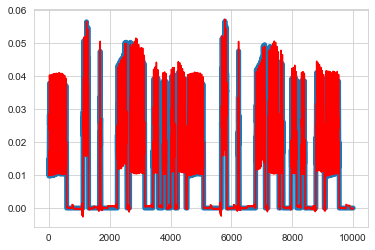

In [22]:
from matplotlib import pyplot as plt
(ystart,yend)  = (0,10000)
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Test on test grid(can be a cell)

In [39]:
testset3030  = spec1_trainset.loc[(spec1_trainset["x"] > 200) & (spec1_trainset["y"] >300)]
#testset3030["hour_sin"] = np.sin(testset3030["hour"]*2*np.pi/24)
#testset3030 = testset3030.drop(columns = ['hour'])
testset3030

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
732048,201,301,0,0.000000,0.0,0.0,0.000000,0.0,20.239206,2.457334,0.010470,0.000000,0.010505,0.0,0.000000
732049,201,301,1,0.000000,0.0,0.0,0.000000,0.0,20.239206,2.457334,0.009165,0.000000,0.009171,0.0,0.000000
732050,201,301,2,0.000000,0.0,0.0,0.000000,0.0,20.239206,2.457334,0.009277,0.000000,0.009310,0.0,0.000000
732051,201,301,3,0.000195,0.0,0.0,0.000132,0.0,20.239206,2.457334,0.012533,0.000000,0.012621,0.0,0.000000
732052,201,301,4,0.000098,0.0,0.0,0.000066,0.0,20.239206,2.457334,0.012244,0.000000,0.012349,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079995,249,349,43,0.000000,0.0,0.0,0.000000,0.0,0.000000,2.457334,0.000000,0.011800,0.011717,0.0,0.011732
1079996,249,349,44,0.000000,0.0,0.0,0.000000,0.0,0.000000,2.457334,0.000000,0.014070,0.013944,0.0,0.013980
1079997,249,349,45,0.000000,0.0,0.0,0.000000,0.0,0.000000,2.457334,0.000000,0.017873,0.017751,0.0,0.017794
1079998,249,349,46,0.000000,0.0,0.0,0.000000,0.0,0.000000,2.457334,0.000000,0.018957,0.018886,0.0,0.018918


In [40]:
window_size = 4
ml_testset3030 = reshape_whole_table(testset3030,window_size =window_size,drop_columns=["x","y","building_height","wind"],target_value="emission_value_out",include_target=True)
ml_testset3030 = ml_testset3030.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)
ml_testset3030


,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out
0,201,301,20.239206,2.457334,0,0.000000,0.0,0.0,0.000000,0.0,0.010470,0.000000,0.010505,0.0,0.000000,1,0.000000,0.0,0.0,0.000000,0.0,0.009165,0.000000,0.009171,0.0,0.000000,2,0.000000,0.0,0.0,0.000000,0.0,0.009277,0.000000,0.009310,0.0,0.000000,3,0.000195,0.0,0.0,0.000132,0.0,0.000000
1,201,301,20.239206,2.457334,1,0.000000,0.0,0.0,0.000000,0.0,0.009165,0.000000,0.009171,0.0,0.000000,2,0.000000,0.0,0.0,0.000000,0.0,0.009277,0.000000,0.009310,0.0,0.000000,3,0.000195,0.0,0.0,0.000132,0.0,0.012533,0.000000,0.012621,0.0,0.000000,4,0.000098,0.0,0.0,0.000066,0.0,0.000000
2,201,301,20.239206,2.457334,2,0.000000,0.0,0.0,0.000000,0.0,0.009277,0.000000,0.009310,0.0,0.000000,3,0.000195,0.0,0.0,0.000132,0.0,0.012533,0.000000,0.012621,0.0,0.000000,4,0.000098,0.0,0.0,0.000066,0.0,0.012244,0.000000,0.012349,0.0,0.000000,5,0.000195,0.0,0.0,0.000132,0.0,0.000000
3,201,301,20.239206,2.457334,3,0.000195,0.0,0.0,0.000132,0.0,0.012533,0.000000,0.012621,0.0,0.000000,4,0.000098,0.0,0.0,0.000066,0.0,0.012244,0.000000,0.012349,0.0,0.000000,5,0.000195,0.0,0.0,0.000132,0.0,0.010405,0.000000,0.010492,0.0,0.000000,6,0.000293,0.0,0.0,0.000199,0.0,0.000000
4,201,301,20.239206,2.457334,4,0.000098,0.0,0.0,0.000066,0.0,0.012244,0.000000,0.012349,0.0,0.000000,5,0.000195,0.0,0.0,0.000132,0.0,0.010405,0.000000,0.010492,0.0,0.000000,6,0.000293,0.0,0.0,0.000199,0.0,0.009992,0.000000,0.010090,0.0,0.000000,7,0.000397,0.0,0.0,0.000269,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,249,349,0.000000,2.457334,40,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.008415,0.008396,0.0,0.008390,41,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.009018,0.008957,0.0,0.008970,42,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.009607,0.009568,0.0,0.009581,43,0.000000,0.0,0.0,0.000000,0.0,0.011732
41,249,349,0.000000,2.457334,41,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.009018,0.008957,0.0,0.008970,42,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.009607,0.009568,0.0,0.009581,43,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.011800,0.011717,0.0,0.011732,44,0.000000,0.0,0.0,0.000000,0.0,0.013980
42,249,349,0.000000,2.457334,42,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.009607,0.009568,0.0,0.009581,43,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.011800,0.011717,0.0,0.011732,44,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.014070,0.013944,0.0,0.013980,45,0.000000,0.0,0.0,0.000000,0.0,0.017794
43,249,349,0.000000,2.457334,43,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.011800,0.011717,0.0,0.011732,44,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.014070,0.013944,0.0,0.013980,45,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.017873,0.017751,0.0,0.017794,46,0.000000,0.0,0.0,0.000000,0.0,0.018918


In [41]:
#ml_spec1_trainset.to_csv("../data/trainset_windowed_500.csv",index=False,sep =";",encoding='utf-8', float_format='%.15f')
#ml_testset3030.to_csv("../data/testset_windowed_500.csv",index=False,sep =";",encoding='utf-8', float_format='%.15f')

In [42]:
filtered_columns = ml_testset3030.filter(regex='emission_value_out$')
ml_testset3030 = ml_testset3030.drop(["wind"],axis = 1)
ml_testset3030["wind"] = 2.4573
ml_testset3030.loc[:,~ml_testset3030.columns.isin(filtered_columns.columns)]

,x,y,building_height,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),wind
0,201,301,20.239206,0,0.000000,0.0,0.0,0.000000,0.0,0.010470,0.000000,0.010505,0.0,0.000000,1,0.000000,0.0,0.0,0.000000,0.0,0.009165,0.000000,0.009171,0.0,0.000000,2,0.000000,0.0,0.0,0.000000,0.0,0.009277,0.000000,0.009310,0.0,0.000000,3,0.000195,0.0,0.0,0.000132,0.0,2.4573
1,201,301,20.239206,1,0.000000,0.0,0.0,0.000000,0.0,0.009165,0.000000,0.009171,0.0,0.000000,2,0.000000,0.0,0.0,0.000000,0.0,0.009277,0.000000,0.009310,0.0,0.000000,3,0.000195,0.0,0.0,0.000132,0.0,0.012533,0.000000,0.012621,0.0,0.000000,4,0.000098,0.0,0.0,0.000066,0.0,2.4573
2,201,301,20.239206,2,0.000000,0.0,0.0,0.000000,0.0,0.009277,0.000000,0.009310,0.0,0.000000,3,0.000195,0.0,0.0,0.000132,0.0,0.012533,0.000000,0.012621,0.0,0.000000,4,0.000098,0.0,0.0,0.000066,0.0,0.012244,0.000000,0.012349,0.0,0.000000,5,0.000195,0.0,0.0,0.000132,0.0,2.4573
3,201,301,20.239206,3,0.000195,0.0,0.0,0.000132,0.0,0.012533,0.000000,0.012621,0.0,0.000000,4,0.000098,0.0,0.0,0.000066,0.0,0.012244,0.000000,0.012349,0.0,0.000000,5,0.000195,0.0,0.0,0.000132,0.0,0.010405,0.000000,0.010492,0.0,0.000000,6,0.000293,0.0,0.0,0.000199,0.0,2.4573
4,201,301,20.239206,4,0.000098,0.0,0.0,0.000066,0.0,0.012244,0.000000,0.012349,0.0,0.000000,5,0.000195,0.0,0.0,0.000132,0.0,0.010405,0.000000,0.010492,0.0,0.000000,6,0.000293,0.0,0.0,0.000199,0.0,0.009992,0.000000,0.010090,0.0,0.000000,7,0.000397,0.0,0.0,0.000269,0.0,2.4573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,249,349,0.000000,40,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.008415,0.008396,0.0,0.008390,41,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.009018,0.008957,0.0,0.008970,42,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.009607,0.009568,0.0,0.009581,43,0.000000,0.0,0.0,0.000000,0.0,2.4573
41,249,349,0.000000,41,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.009018,0.008957,0.0,0.008970,42,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.009607,0.009568,0.0,0.009581,43,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.011800,0.011717,0.0,0.011732,44,0.000000,0.0,0.0,0.000000,0.0,2.4573
42,249,349,0.000000,42,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.009607,0.009568,0.0,0.009581,43,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.011800,0.011717,0.0,0.011732,44,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.014070,0.013944,0.0,0.013980,45,0.000000,0.0,0.0,0.000000,0.0,2.4573
43,249,349,0.000000,43,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.011800,0.011717,0.0,0.011732,44,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.014070,0.013944,0.0,0.013980,45,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.017873,0.017751,0.0,0.017794,46,0.000000,0.0,0.0,0.000000,0.0,2.4573


RMSE = 0.0017919947
MAE = 0.0009417577
MAPE = 676014138446.68%


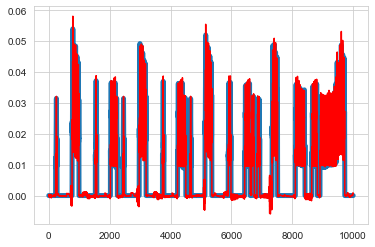

In [43]:
test_lr_y = ml_testset3030["emission_value_out"].values
filtered_columns = ml_testset3030.filter(regex='emission_value_out$') #nb.*out|
test_lr_y_pred = lr_model.predict(ml_testset3030.loc[:,~ml_testset3030.columns.isin(filtered_columns.columns)])


test_lr_residuals = test_lr_y_pred - test_lr_y
test_lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(test_lr_y,test_lr_y_pred))
print('MAPE = %.2f' % mean_absolute_percentage_error(test_lr_y,test_lr_y_pred) +"%")

(ystart,yend)  = (0,10000)
plt.plot([i for i in range(len(test_lr_y[ystart:yend]))],test_lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(test_lr_y_pred[ystart:yend]))],test_lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Helper function for visualization 

In [44]:
import seaborn as sns
import matplotlib.pylab as plt
def make_heatmap_from_pd(result_dataframe,hour,hour_name = "hour",target_name = "emission_value"):
    result_1specieshour = result_dataframe.loc[result_dataframe[hour_name] == hour]
    result_1specieshour = result_1specieshour[["x","y",target_name]]
    #print(result_1specieshour)
    x = result_1specieshour["x"].max() - result_1specieshour["x"].min() + 1
    y = result_1specieshour["y"].max() - result_1specieshour["y"].min() + 1
    v = result_1specieshour[target_name].to_numpy().reshape((x, y))
    indices = result_1specieshour[["x", 'y']].to_numpy().T
    indices[0] = indices[0] - indices[0].min()
    indices[1] = indices[1] - indices[1].min()

    v = np.tile(np.nan, indices.max(axis=1)+1)
    v[tuple(indices)] = result_1specieshour[target_name]
    ax = sns.heatmap(v)
    plt.show()

### Adding predicted colmn and results visualization

In [45]:
viz_ml = ml_testset3030.copy()
viz_ml["pred_emission_value_out"] = test_lr_y_pred
#viz_ml["hour_sin(3)"] = np.arcsin(viz_ml["hour_sin(3)"])*48/(2*np.pi)
viz_ml

,x,y,building_height,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out,wind,pred_emission_value_out
0,201,301,20.239206,0,0.000000,0.0,0.0,0.000000,0.0,0.010470,0.000000,0.010505,0.0,0.000000,1,0.000000,0.0,0.0,0.000000,0.0,0.009165,0.000000,0.009171,0.0,0.000000,2,0.000000,0.0,0.0,0.000000,0.0,0.009277,0.000000,0.009310,0.0,0.000000,3,0.000195,0.0,0.0,0.000132,0.0,0.000000,2.4573,0.000054
1,201,301,20.239206,1,0.000000,0.0,0.0,0.000000,0.0,0.009165,0.000000,0.009171,0.0,0.000000,2,0.000000,0.0,0.0,0.000000,0.0,0.009277,0.000000,0.009310,0.0,0.000000,3,0.000195,0.0,0.0,0.000132,0.0,0.012533,0.000000,0.012621,0.0,0.000000,4,0.000098,0.0,0.0,0.000066,0.0,0.000000,2.4573,-0.000005
2,201,301,20.239206,2,0.000000,0.0,0.0,0.000000,0.0,0.009277,0.000000,0.009310,0.0,0.000000,3,0.000195,0.0,0.0,0.000132,0.0,0.012533,0.000000,0.012621,0.0,0.000000,4,0.000098,0.0,0.0,0.000066,0.0,0.012244,0.000000,0.012349,0.0,0.000000,5,0.000195,0.0,0.0,0.000132,0.0,0.000000,2.4573,0.000202
3,201,301,20.239206,3,0.000195,0.0,0.0,0.000132,0.0,0.012533,0.000000,0.012621,0.0,0.000000,4,0.000098,0.0,0.0,0.000066,0.0,0.012244,0.000000,0.012349,0.0,0.000000,5,0.000195,0.0,0.0,0.000132,0.0,0.010405,0.000000,0.010492,0.0,0.000000,6,0.000293,0.0,0.0,0.000199,0.0,0.000000,2.4573,-0.000048
4,201,301,20.239206,4,0.000098,0.0,0.0,0.000066,0.0,0.012244,0.000000,0.012349,0.0,0.000000,5,0.000195,0.0,0.0,0.000132,0.0,0.010405,0.000000,0.010492,0.0,0.000000,6,0.000293,0.0,0.0,0.000199,0.0,0.009992,0.000000,0.010090,0.0,0.000000,7,0.000397,0.0,0.0,0.000269,0.0,0.000000,2.4573,-0.000071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,249,349,0.000000,40,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.008415,0.008396,0.0,0.008390,41,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.009018,0.008957,0.0,0.008970,42,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.009607,0.009568,0.0,0.009581,43,0.000000,0.0,0.0,0.000000,0.0,0.011732,2.4573,0.009877
41,249,349,0.000000,41,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.009018,0.008957,0.0,0.008970,42,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.009607,0.009568,0.0,0.009581,43,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.011800,0.011717,0.0,0.011732,44,0.000000,0.0,0.0,0.000000,0.0,0.013980,2.4573,0.012377
42,249,349,0.000000,42,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.009607,0.009568,0.0,0.009581,43,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.011800,0.011717,0.0,0.011732,44,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.014070,0.013944,0.0,0.013980,45,0.000000,0.0,0.0,0.000000,0.0,0.017794,2.4573,0.014476
43,249,349,0.000000,43,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.011800,0.011717,0.0,0.011732,44,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.014070,0.013944,0.0,0.013980,45,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.017873,0.017751,0.0,0.017794,46,0.000000,0.0,0.0,0.000000,0.0,0.018918,2.4573,0.018567


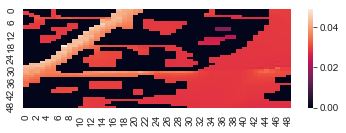

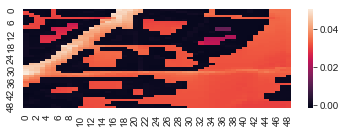

In [46]:
hour = 29
plt.subplot(2,1,1)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="emission_value_out")
plt.subplot(2,1,2)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="pred_emission_value_out")

## Random Forest regressor

### Train on subset

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
lr_model = RandomForestRegressor(max_depth=8)
filtered_columns = trainset.filter(regex='emission_value_out$').columns#
lr_model.fit(trainset.loc[:,~trainset.columns.isin(filtered_columns)] , trainset["emission_value_out"])

t0 = time.time()
lr_y = testset['emission_value_out'].values
lr_y_fit = lr_model.predict(trainset.loc[:,~trainset.columns.isin(filtered_columns)])
lr_y_pred = lr_model.predict(trainset.loc[:,~trainset.columns.isin(filtered_columns)])
tF = time.time()

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(lr_y,lr_y_pred))
print('Time to train = %.2f seconds' % (tF - t0))

RMSE = 0.0012633668
MAE = 0.0005033718
Time to train = 0.53 seconds


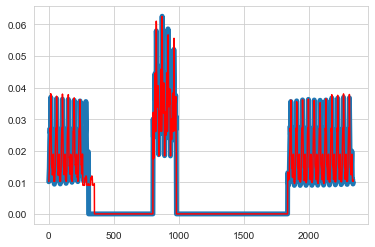

In [25]:
from matplotlib import pyplot as plt
(ystart,yend)  = (int(len(lr_y)*0.2),int(len(lr_y)*0.22))
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Test on another subset

RMSE = 0.0012620623
MAE = 0.0005867406
MAPE = 0.04%


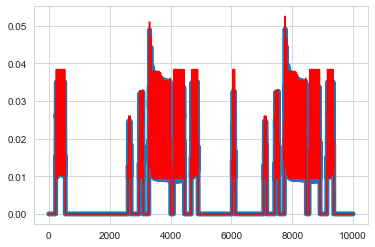

In [48]:
test_lr_y = ml_testset3030["emission_value_out"].values
filtered_columns = trainset.filter(regex='nb.*out|emission_value_out$')
test_lr_y_pred = lr_model.predict(ml_testset3030.loc[:,~ml_testset3030.columns.isin(filtered_columns.columns)])


test_lr_residuals = test_lr_y_pred - test_lr_y
test_lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(test_lr_y,test_lr_y_pred))
print('MAPE = %.2f' % mean_absolute_percentage_error(test_lr_y,test_lr_y_pred) +"%")

(ystart,yend)  = (0,10000)
plt.plot([i for i in range(len(test_lr_y[ystart:yend]))],test_lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(test_lr_y_pred[ystart:yend]))],test_lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Visualization

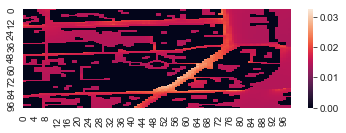

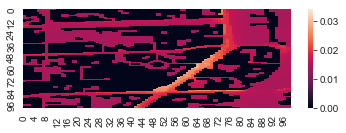

In [49]:
viz_ml = ml_testset3030.copy()
viz_ml["pred_emission_value_out"] = test_lr_y_pred
hour = 35
plt.subplot(2,1,1)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="emission_value_out")
plt.subplot(2,1,2)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="pred_emission_value_out")

## XGBoost

### Train on subset

In [49]:
trainset = trainset.drop(["wind"],axis = 1)
trainset["wind"] = 2.4573
testset = ml_testset3030

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
lr_model = GradientBoostingRegressor()
filtered_columns = trainset.filter(regex='emission_value_out$').columns#
lr_model.fit(trainset.loc[:,~trainset.columns.isin(filtered_columns)], trainset["emission_value_out"])

t0 = time.time()
lr_y = testset['emission_value_out'].values
lr_y_fit = lr_model.predict(trainset.loc[:,~trainset.columns.isin(filtered_columns)])
lr_y_pred = lr_model.predict(testset.loc[:,~trainset.columns.isin(filtered_columns)])
tF = time.time()

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(lr_y,lr_y_pred))
print('Time to train = %.2f seconds' % (tF - t0))

KeyboardInterrupt: 

In [50]:
from xgboost import  XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
xgb_model = XGBRegressor()
filtered_columns = trainset.filter(regex='emission_value_out$').columns#
xgb_model.fit(trainset.loc[:,~trainset.columns.isin(filtered_columns)], trainset["emission_value_out"])

t0 = time.time()
lr_y = testset['emission_value_out'].values
lr_y_fit = xgb_model.predict(trainset.loc[:,~trainset.columns.isin(filtered_columns)])
lr_y_pred = xgb_model.predict(testset.loc[:,~trainset.columns.isin(filtered_columns)])
tF = time.time()

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(lr_y,lr_y_pred))
print('Time to train = %.2f seconds' % (tF - t0))

RMSE = 0.0008534655
MAE = 0.0004232035
Time to train = 0.37 seconds


In [51]:
xgb_model.save_model("xgb_model.json")

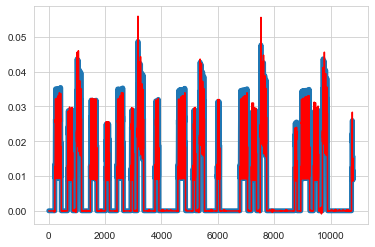

In [52]:
from matplotlib import pyplot as plt
(ystart,yend)  = (int(len(lr_y)*0.2),int(len(lr_y)*0.3))
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(lr_y[ystart:yend]))],lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Test on another subset

RMSE = 0.0008534655
MAE = 0.0004232035
MAPE = 139497951121.43%


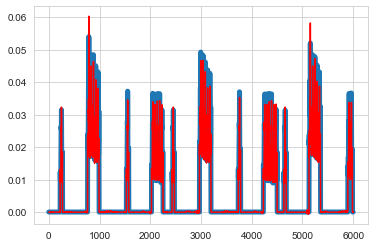

In [53]:
test_lr_y = ml_testset3030["emission_value_out"].values
filtered_columns = trainset.filter(regex='emission_value_out$').columns#
test_lr_y_pred = xgb_model.predict(ml_testset3030.loc[:,~ml_testset3030.columns.isin(filtered_columns)])


test_lr_residuals = test_lr_y_pred - test_lr_y
test_lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(test_lr_y,test_lr_y_pred))
print('MAPE = %.2f' % mean_absolute_percentage_error(test_lr_y,test_lr_y_pred) +"%")

(ystart,yend)  = (0,6000)
plt.plot([i for i in range(len(test_lr_y[ystart:yend]))],test_lr_y[ystart:yend],label = "Actual y",linewidth = 5)
plt.plot([i for i in range(len(test_lr_y_pred[ystart:yend]))],test_lr_y_pred[ystart:yend],label = "Predicted y",alpha =1,color = "red")
plt.show()

### Visualization

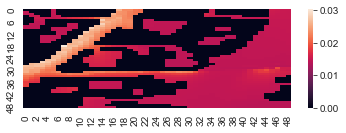

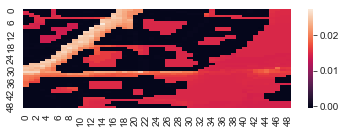

In [54]:
viz_ml = ml_testset3030.copy()
viz_ml["pred_emission_value_out"] = test_lr_y_pred
hour = 33
plt.subplot(2,1,1)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="emission_value_out")
plt.subplot(2,1,2)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="pred_emission_value_out")

## Neural Network

In [33]:
# Here goes work with neural networks, but atm we jump to cutting nighttime information out, due to irrelevance

# Dataset without nighttime palm inputs and outputs

### Preparing datasets

In [13]:
day_spec1 = spec1_trainset.loc[(spec1_trainset["hour"]>=27) & (spec1_trainset["hour"]<=44)& (spec1_trainset["x"]<=180) &  (spec1_trainset["y"]<=280)]
day_spec1

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
27,100,200,27,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.457334,0.038015,0.000000,0.000000,0.037861,0.037880
28,100,200,28,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.457334,0.035078,0.000000,0.000000,0.035003,0.034906
29,100,200,29,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.457334,0.029295,0.000000,0.000000,0.029518,0.029462
30,100,200,30,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.457334,0.027518,0.000000,0.000000,0.027671,0.027728
31,100,200,31,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.457334,0.022723,0.000000,0.000000,0.022824,0.022817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579880,180,280,40,0.000109,0.0,0.000274,0.000165,0.0,0.0,2.457334,0.009663,0.009885,0.009749,0.009740,0.009771
579881,180,280,41,0.000109,0.0,0.000275,0.000166,0.0,0.0,2.457334,0.010125,0.010423,0.010267,0.010213,0.010268
579882,180,280,42,0.000109,0.0,0.000251,0.000143,0.0,0.0,2.457334,0.010988,0.011258,0.011012,0.011179,0.011126
579883,180,280,43,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.457334,0.013349,0.013502,0.013460,0.013363,0.013441


In [9]:
#parameters
window_size = 4
#trainset
day_trainset = day_spec1.copy()
day_trainset = day_trainset.loc[(day_trainset["x"]<= 150) & (day_trainset["y"]<=150)]
day_trainset_windowed_temp = reshape_to_window(day_trainset,window_size=window_size,drop_columns=["x","y","building_height","wind"],include_target=True,target_value="emission_value_out")
day_trainset_windowed_temp = day_trainset_windowed_temp.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)

#testset
day_testset = day_spec1.copy()
day_testset = day_spec1.loc[(day_spec1["x"]> 150) & (day_spec1["y"]>150)] # XXX Change it here
day_testset_windowed_temp = reshape_to_window(day_testset,window_size=window_size,drop_columns=["x","y","building_height","wind"],include_target=True,target_value="emission_value_out")
day_testset_windowed_temp = day_testset_windowed_temp.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)



In [11]:
filtered_columns = day_testset_windowed_temp.filter(regex='nb.*out|emission_value_out$')

day_trainset_target = day_trainset_windowed_temp["emission_value_out"]
day_trainset_windowed = day_trainset_windowed_temp.loc[:,~day_trainset_windowed_temp.columns.isin(filtered_columns.columns)]

day_testset_target = day_testset_windowed_temp["emission_value_out"]
day_testset_windowed = day_testset_windowed_temp.loc[:,~day_testset_windowed_temp.columns.isin(filtered_columns.columns)]
day_testset_windowed


,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3)
0,151,151,23.282904,2.457334,27,0.0,0.0,0.0,0.0,0.0,0.000000,28,0.0,0.0,0.0,0.0,0.0,0.000000,29,0.0,0.0,0.0,0.0,0.0,0.000000,30,0.0,0.0,0.0,0.0,0.0
1,151,151,23.282904,2.457334,28,0.0,0.0,0.0,0.0,0.0,0.000000,29,0.0,0.0,0.0,0.0,0.0,0.000000,30,0.0,0.0,0.0,0.0,0.0,0.000000,31,0.0,0.0,0.0,0.0,0.0
2,151,151,23.282904,2.457334,29,0.0,0.0,0.0,0.0,0.0,0.000000,30,0.0,0.0,0.0,0.0,0.0,0.000000,31,0.0,0.0,0.0,0.0,0.0,0.000000,32,0.0,0.0,0.0,0.0,0.0
3,151,151,23.282904,2.457334,30,0.0,0.0,0.0,0.0,0.0,0.000000,31,0.0,0.0,0.0,0.0,0.0,0.000000,32,0.0,0.0,0.0,0.0,0.0,0.000000,33,0.0,0.0,0.0,0.0,0.0
4,151,151,23.282904,2.457334,31,0.0,0.0,0.0,0.0,0.0,0.000000,32,0.0,0.0,0.0,0.0,0.0,0.000000,33,0.0,0.0,0.0,0.0,0.0,0.000000,34,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192410,499,499,0.000000,2.457334,37,0.0,0.0,0.0,0.0,0.0,0.012283,38,0.0,0.0,0.0,0.0,0.0,0.010765,39,0.0,0.0,0.0,0.0,0.0,0.010280,40,0.0,0.0,0.0,0.0,0.0
2192411,499,499,0.000000,2.457334,38,0.0,0.0,0.0,0.0,0.0,0.010765,39,0.0,0.0,0.0,0.0,0.0,0.010280,40,0.0,0.0,0.0,0.0,0.0,0.009452,41,0.0,0.0,0.0,0.0,0.0
2192412,499,499,0.000000,2.457334,39,0.0,0.0,0.0,0.0,0.0,0.010280,40,0.0,0.0,0.0,0.0,0.0,0.009452,41,0.0,0.0,0.0,0.0,0.0,0.010321,42,0.0,0.0,0.0,0.0,0.0
2192413,499,499,0.000000,2.457334,40,0.0,0.0,0.0,0.0,0.0,0.009452,41,0.0,0.0,0.0,0.0,0.0,0.010321,42,0.0,0.0,0.0,0.0,0.0,0.010381,43,0.0,0.0,0.0,0.0,0.0


## Linear Regression

### Train on subset

In [54]:
day_lr_model = LinearRegression()
day_lr_model.fit(day_trainset_windowed,day_trainset_target)

LinearRegression()

### Test on subset

In [13]:
pred_day_testset_target = lr_model.predict(day_testset_windowed)

lr_y = day_testset_target
lr_y_pred = pred_day_testset_target
lr_residuals = day_testset_target - pred_day_testset_target
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals, 2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(lr_y, lr_y_pred))

(ystart, yend) = (0, 200)
plt.plot([i for i in range(len(lr_y[ystart:yend]))], lr_y[ystart:yend], label="Actual y", linewidth=5)
plt.plot([i for i in range(len(lr_y[ystart:yend]))], lr_y_pred[ystart:yend], label="Predicted y", alpha=1, color="red")
plt.show()


NameError: name 'lr_model' is not defined

### Visualiztion

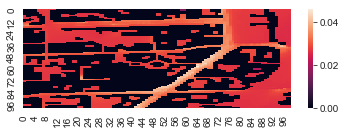

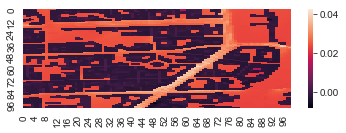

In [56]:
viz_ml = day_testset_windowed.copy()
viz_ml["pred_emission_value_out"] = lr_y_pred
viz_ml["emission_value_out"] = lr_y
hour = 30
plt.subplot(2,1,1)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="emission_value_out")
plt.subplot(2,1,2)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="pred_emission_value_out")

## Random Forest Regressor

### Train on subset

In [57]:
day_rf_model = RandomForestRegressor()
day_rf_model.fit(day_trainset_windowed,day_trainset_target)

RandomForestRegressor()

### Test on subset

RMSE = 0.0038902611
MAE = 0.0011599241


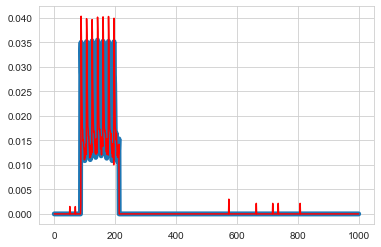

In [58]:
pred_day_testset_target = day_rf_model.predict(day_testset_windowed)

lr_y = day_testset_target
lr_y_pred = pred_day_testset_target
lr_residuals = day_testset_target - pred_day_testset_target
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals, 2)) / len(lr_residuals))
print('RMSE = %.10f' % lr_rmse)
print('MAE = %.10f' % mean_absolute_error(lr_y, lr_y_pred))

(ystart, yend) = (0, 1000)
plt.plot([i for i in range(len(lr_y[ystart:yend]))], lr_y[ystart:yend], label="Actual y", linewidth=5)
plt.plot([i for i in range(len(lr_y[ystart:yend]))], lr_y_pred[ystart:yend], label="Predicted y", alpha=1, color="red")
plt.show()

### Visualization

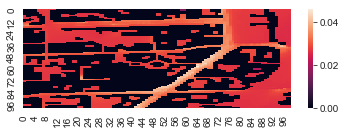

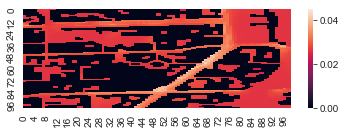

In [59]:
viz_ml = day_testset_windowed.copy()
viz_ml["pred_emission_value_out"] = lr_y_pred
viz_ml["emission_value_out"] = lr_y
hour = 30
plt.subplot(2,1,1)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="emission_value_out")
plt.subplot(2,1,2)
make_heatmap_from_pd(viz_ml,hour,hour_name="hour(3)",target_name="pred_emission_value_out")

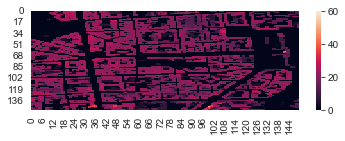

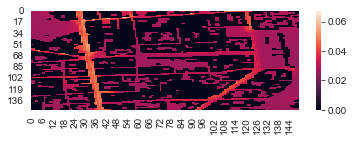

In [60]:
hour = 30
plt.subplot(2,1,1)
make_heatmap_from_pd(spec1_trainset,hour,hour_name="hour",target_name="building_height")
plt.subplot(2,1,2)
make_heatmap_from_pd(spec1_trainset,hour,hour_name="hour",target_name="emission_value_out")

# Rowwise proof. Test with artificially filled first hours

In [114]:
ml_testset3030.loc[(ml_testset3030["emission_value_out"]>=0.01) & (ml_testset3030["hour(3)"]==25)].describe()


,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out
count,4406.000000,4406.000000,4406.000000,4.406000e+03,4406.0,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.0,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.0,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.0,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,198.048570,306.204721,0.182115,2.457334e+00,22.0,0.000029,0.000021,0.000034,0.000033,0.000025,0.022444,0.022638,0.023153,0.023038,0.026659,23.0,0.000033,0.000029,0.000035,0.000035,0.000030,0.021567,0.021743,0.022212,0.022104,0.025586,24.0,0.000038,0.000028,0.000045,0.000045,0.000031,0.021623,0.021812,0.022304,0.022186,0.025686,25.0,0.000021,0.000019,0.000024,0.000025,0.000017,0.025464
std,29.765346,30.087558,0.797417,4.441396e-16,0.0,0.000132,0.000112,0.000140,0.000141,0.000123,0.009835,0.009674,0.009183,0.009294,0.001389,0.0,0.000171,0.000167,0.000174,0.000174,0.000165,0.009437,0.009271,0.008782,0.008890,0.001094,0.0,0.000149,0.000132,0.000163,0.000166,0.000129,0.009445,0.009282,0.008799,0.008904,0.000905,0.0,0.000114,0.000108,0.000122,0.000123,0.000105,0.000712
min,151.000000,251.000000,0.000000,2.457334e+00,22.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019772,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019530,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019607,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.018690
25%,172.000000,279.000000,0.000000,2.457334e+00,22.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.026031,0.026020,0.026106,0.026099,0.026309,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.024907,0.024890,0.024964,0.024958,0.025127,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025219,0.025213,0.025246,0.025263,0.025392,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025314
50%,194.000000,310.000000,0.000000,2.457334e+00,22.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.026533,0.026527,0.026534,0.026543,0.026607,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025335,0.025318,0.025325,0.025334,0.025430,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025541,0.025540,0.025574,0.025581,0.025633,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025481
75%,227.000000,334.000000,0.000000,2.457334e+00,22.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.026932,0.026947,0.026944,0.026944,0.027012,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025883,0.025885,0.025889,0.025885,0.025964,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025940,0.025977,0.026049,0.026010,0.026091,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025739
max,249.000000,349.000000,4.900400,2.457334e+00,22.0,0.001463,0.001463,0.001463,0.001463,0.001463,0.034337,0.037363,0.037363,0.037363,0.037363,23.0,0.002132,0.002132,0.002132,0.002132,0.002132,0.030223,0.031431,0.031431,0.030009,0.031431,24.0,0.001775,0.001775,0.001775,0.001775,0.001775,0.030537,0.031364,0.031364,0.030537,0.031364,25.0,0.001348,0.001348,0.001348,0.001318,0.001348,0.029470


In [37]:
filled_day_spec1 = fill_with_art_hours_optimized(day_spec1.loc[day_spec1["hour"]<=27],spec1_trainset,fill_value=0.034092,number_of_hours=3).sort_values(by = ['x', 'y','hour'], ascending = [True, True,True])
filled_day_spec1.to_csv("../data/filled_day_spec1.csv",index=False,sep =";",encoding='utf-8', float_format='%.15f')
filled_day_spec1

,x,y,hour,emission_value,nbr,nbl,nbu,nbd,building_height,wind,nbr_out,nbl_out,nbu_out,nbd_out,emission_value_out
1,100,200,24,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.457334,0.034092,0.000000,0.034092,0.034092,0.034092
2,100,200,25,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.457334,0.034092,0.000000,0.034092,0.034092,0.034092
3,100,200,26,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.457334,0.034092,0.000000,0.034092,0.034092,0.034092
0,100,200,27,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.457334,0.038015,0.000000,0.000000,0.037861,0.037880
5,100,201,24,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.457334,0.034092,0.000000,0.034092,0.034092,0.034092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26236,180,279,27,0.000052,0.000161,0.000000,0.000000,0.000109,0.0,2.457334,0.033505,0.033241,0.033426,0.033411,0.033411
26241,180,280,24,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.457334,0.034092,0.034092,0.034092,0.034092,0.034092
26242,180,280,25,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.457334,0.034092,0.034092,0.034092,0.034092,0.034092
26243,180,280,26,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.457334,0.034092,0.034092,0.034092,0.034092,0.034092


In [32]:
filled_day_spec1 = pd.read_csv("../data/filled_day_spec1.csv",sep =";")


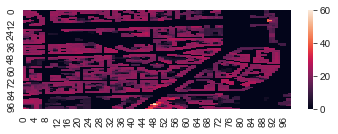

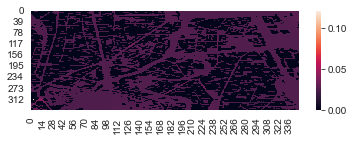

In [33]:
hour = 24
plt.subplot(2,1,1)
make_heatmap_from_pd(result_dataframe=filled_day_spec1,target_name="building_height",hour=hour)
plt.subplot(2,1,2)
make_heatmap_from_pd(result_dataframe=ml_testset3030,target_name="emission_value_out",hour=hour,hour_name="hour(3)")

In [34]:
window_size = 4
sliding_day_spec1 = reshape_whole_table(filled_day_spec1.loc[filled_day_spec1["hour"]<=27],window_size,target_value="emission_value_out",drop_columns=["x","y","building_height","wind"],include_target=True)
sliding_day_spec1 = sliding_day_spec1.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)
sliding_day_spec1

,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out
0,151,251,19.335487,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,27,0.0,0.0,0.000000,0.0,0.0,0.000000
0,151,252,18.477552,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,27,0.0,0.0,0.000000,0.0,0.0,0.000000
0,151,253,20.896000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.000000,27,0.0,0.0,0.000193,0.0,0.0,0.000000
0,151,254,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.025644,27,0.0,0.0,0.000537,0.0,0.0,0.000000
0,151,255,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.025644,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.025644,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.025644,0.025644,0.025644,27,0.0,0.0,0.000151,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,249,345,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,27,0.0,0.0,0.000000,0.0,0.0,0.032695
0,249,346,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,27,0.0,0.0,0.000000,0.0,0.0,0.032644
0,249,347,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,27,0.0,0.0,0.000000,0.0,0.0,0.032584
0,249,348,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,27,0.0,0.0,0.000000,0.0,0.0,0.032519


In [35]:
filtered_columns = sliding_day_spec1.filter(regex='emission_value_out$').columns
pred_sliding_value = lr_model.predict(sliding_day_spec1.loc[:,~sliding_day_spec1.columns.isin(filtered_columns)])
sliding_day_spec1["pred_emission_value_out"] = list(pred_sliding_value)

In [36]:
sliding_day_spec1

,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out,pred_emission_value_out
0,151,251,19.335487,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,27,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000956
0,151,252,18.477552,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,27,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000956
0,151,253,20.896000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.000000,27,0.0,0.0,0.000193,0.0,0.0,0.000000,0.000956
0,151,254,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.025644,27,0.0,0.0,0.000537,0.0,0.0,0.000000,0.027981
0,151,255,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.025644,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.025644,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.025644,0.025644,0.025644,27,0.0,0.0,0.000151,0.0,0.0,0.000000,0.027981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,249,345,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,27,0.0,0.0,0.000000,0.0,0.0,0.032695,0.027981
0,249,346,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,27,0.0,0.0,0.000000,0.0,0.0,0.032644,0.027981
0,249,347,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,27,0.0,0.0,0.000000,0.0,0.0,0.032584,0.027981
0,249,348,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.025644,0.025644,0.025644,27,0.0,0.0,0.000000,0.0,0.0,0.032519,0.027981


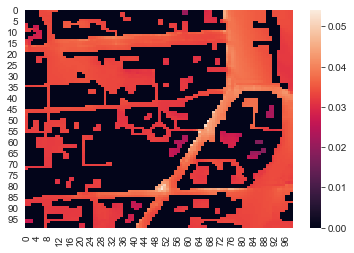

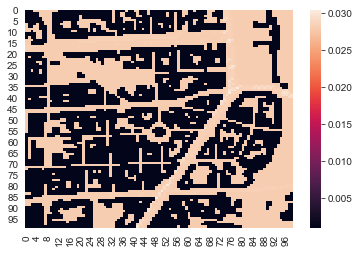

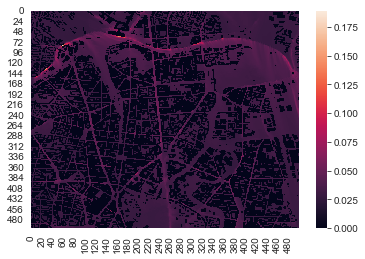

In [37]:
hour = 27

make_heatmap_from_pd(result_dataframe=sliding_day_spec1,target_name="emission_value_out",hour=hour,hour_name="hour(3)")

make_heatmap_from_pd(result_dataframe=sliding_day_spec1,target_name="pred_emission_value_out",hour=hour,hour_name="hour(3)")

make_heatmap_from_pd(result_dataframe=spec1_trainset,target_name="emission_value_out",hour=hour,hour_name="hour")



## Usage of chained_predict method

In [134]:
chained_result = chained_predict(lr_model,spec1_trainset,sliding_day_spec1,max_hour=35) # add ihour processed
chained_result

,x,y,building_height,wind,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out,pred_emission_value_out
0,151,251,19.335487,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,27,0.0,0.0,0.000000,0.0,0.0,0.000000,0.001027
0,151,252,18.477552,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.000000,0.000000,27,0.0,0.0,0.000000,0.0,0.0,0.000000,0.001027
0,151,253,20.896000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.000000,27,0.0,0.0,0.000193,0.0,0.0,0.000000,0.001324
0,151,254,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.025644,0.000000,0.025644,0.025644,27,0.0,0.0,0.000537,0.0,0.0,0.000000,0.028278
0,151,255,0.000000,2.457334,24,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.025644,0.025644,0.025644,25,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.025644,0.025644,0.025644,26,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.025644,0.025644,0.025644,27,0.0,0.0,0.000151,0.0,0.0,0.000000,0.028278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,249,345,0.000000,2.457334,31,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.029989,32,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.026885,33,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.024010,34,0.0,0.0,0.000000,0.0,0.0,0.013951,0.022290
0,249,346,0.000000,2.457334,31,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.029989,32,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.026885,33,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.024010,34,0.0,0.0,0.000000,0.0,0.0,0.013950,0.022290
0,249,347,0.000000,2.457334,31,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.029989,32,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.026885,33,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.024010,34,0.0,0.0,0.000000,0.0,0.0,0.013949,0.022290
0,249,348,0.000000,2.457334,31,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.029989,32,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.026885,33,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.024010,34,0.0,0.0,0.000000,0.0,0.0,0.013950,0.022290


In [135]:
chained_result.to_csv("../data/chained_result_XGBoost_35max.csv",index=False,sep =";",encoding='utf-8', float_format='%.15f')

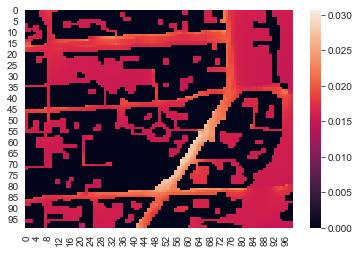

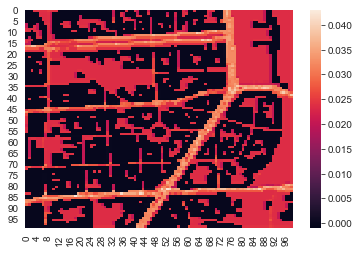

In [139]:
hour = 33

make_heatmap_from_pd(result_dataframe=chained_result,target_name="emission_value_out",hour=hour,hour_name="hour(3)")

make_heatmap_from_pd(result_dataframe=chained_result,target_name="pred_emission_value_out",hour=hour,hour_name="hour(3)")

In [142]:
chained_result["diff"] = chained_result["emission_value_out"] - chained_result["pred_emission_value_out"]

In [144]:
import statistics

print(f"Mean value of real emissions is {statistics.mean(chained_result.loc[chained_result['emission_value_out'] !=0]['emission_value_out'])}\n")
print(f"Mean absolute error  is {mean_absolute_error(chained_result.loc[chained_result['emission_value_out'] !=0]['emission_value_out'],chained_result.loc[chained_result['emission_value_out'] !=0]['pred_emission_value_out'])}")

Mean value of real emissions is 0.027260705215649918

Mean absolute error  is 0.005602082435848288


## Another Window

In [ ]:
import netCDF4 as nc


In [9]:
testset600800 = pd.read_csv("../data/result600-800in.csv",sep =";")
testset600800_day = testset600800.loc[testset600800["hour"]>=24]
#testset600800_day = testset600800_day.loc[(testset600800["x"]<610) & (testset600800["y"]<610)]

In [10]:
import statistics
statistics.mean(testset600800_day.loc[testset600800["hour"]==24]["emission_value"])

5.74733237663215e-06

In [11]:
filled_day_spec1_600800 = fill_with_art_hours(testset600800_day.loc[testset600800_day["hour"]==28],testset600800,fill_value=0.034092,number_of_hours=3).sort_values(by = ['x', 'y','hour'], ascending = [True, True,True])
filled_day_spec1_600800.to_csv("../data/filled_day_spec1_600-800.csv",index=False,sep =";",encoding='utf-8', float_format='%.15f')
filled_day_spec1_600800


KeyboardInterrupt: 

In [5]:
filled_day_spec1_600800 = pd.read_csv("../data/filled_day_spec1_600-800.csv",sep = ";")
filled_day_spec1_600800

,x,y,hour,building_height,emission_value,nbr,nbl,nbu,nbd,emission_value_out,nbr_out,nbl_out,nbu_out,nbd_out
0,600,600,21,0.0,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092
1,600,600,22,0.0,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092
2,600,600,23,0.0,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092
3,600,600,24,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,600,600,25,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,799,799,23,0.0,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000
279996,799,799,24,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
279997,799,799,25,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
279998,799,799,26,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [25]:
window_size = 4
sliding_day_spec1_600800 = reshape_whole_table(filled_day_spec1_600800.loc[filled_day_spec1_600800["hour"]<=27],window_size,target_value="emission_value_out",drop_columns=["x","y","building_height"],include_target=True)
sliding_day_spec1_600800 = sliding_day_spec1_600800.drop(columns=["nbr_out(3)","nbl_out(3)","nbu_out(3)","nbd_out(3)"],axis=1)
sliding_day_spec1_600800

,x,y,building_height,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),emission_value_out(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),emission_value_out(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),emission_value_out(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out
0,600,600,0.0,21,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,22,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,24,0.0,0.0,0.0,0.0,0.0,NaN
1,600,600,0.0,22,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,24,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,25,0.0,0.0,0.0,0.0,0.0,NaN
2,600,600,0.0,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,24,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,25,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,26,0.0,0.0,0.0,0.0,0.0,NaN
3,600,600,0.0,24,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,25,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,26,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,27,0.0,0.0,0.0,0.0,0.0,NaN
0,600,601,0.0,21,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.034092,0.034092,22,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.034092,0.034092,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.034092,0.034092,24,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,799,798,0.0,24,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,25,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,26,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,27,0.0,0.0,0.0,0.0,0.0,NaN
0,799,799,0.0,21,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,22,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,24,0.0,0.0,0.0,0.0,0.0,NaN
1,799,799,0.0,22,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,24,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,25,0.0,0.0,0.0,0.0,0.0,NaN
2,799,799,0.0,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,24,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,25,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,26,0.0,0.0,0.0,0.0,0.0,NaN


In [26]:
sliding_day_spec1_600800.replace(np.nan, 0, inplace=True)
sliding_day_spec1_600800

,x,y,building_height,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),emission_value_out(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),emission_value_out(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),emission_value_out(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out
0,600,600,0.0,21,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,22,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,24,0.0,0.0,0.0,0.0,0.0,0.0
1,600,600,0.0,22,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,24,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0
2,600,600,0.0,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,24,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0
3,600,600,0.0,24,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,27,0.0,0.0,0.0,0.0,0.0,0.0
0,600,601,0.0,21,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.034092,0.034092,22,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.034092,0.034092,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.034092,0.034092,24,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,799,798,0.0,24,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,27,0.0,0.0,0.0,0.0,0.0,0.0
0,799,799,0.0,21,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,22,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,24,0.0,0.0,0.0,0.0,0.0,0.0
1,799,799,0.0,22,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,24,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0
2,799,799,0.0,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,24,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#sliding_day_spec1_600800.to_csv("../data/slidind_day600-800.csv",index=False,sep =";",encoding='utf-8', float_format='%.15f')
sliding_day_spec1_600800 = pd.read_csv("../data/slidind_day600-800.csv",sep = ";")

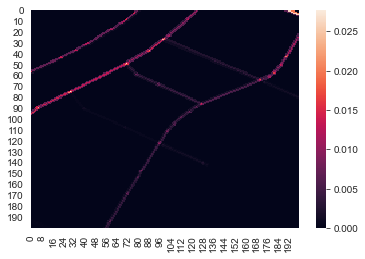

In [25]:
make_heatmap_from_pd(result_dataframe=testset600800,target_name="emission_value",hour=38,hour_name="hour")

In [33]:
sliding_day_spec1_600800["wind"] = 2.4573

In [34]:
sliding_day_spec1_600800

,x,y,building_height,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),emission_value_out(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),emission_value_out(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),emission_value_out(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out,wind
0,600,600,0.0,21,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,22,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,24,0.0,0.0,0.0,0.0,0.0,0.0,2.4573
1,600,600,0.0,22,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,24,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,2.4573
2,600,600,0.0,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.000000,0.034092,24,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,2.4573
3,600,600,0.0,24,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,27,0.0,0.0,0.0,0.0,0.0,0.0,2.4573
4,600,601,0.0,21,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.034092,0.034092,22,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.034092,0.034092,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.034092,0.000000,0.034092,0.034092,24,0.0,0.0,0.0,0.0,0.0,0.0,2.4573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,799,798,0.0,24,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,27,0.0,0.0,0.0,0.0,0.0,0.0,2.4573
159996,799,799,0.0,21,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,22,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,24,0.0,0.0,0.0,0.0,0.0,0.0,2.4573
159997,799,799,0.0,22,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,24,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,2.4573
159998,799,799,0.0,23,0.0,0.0,0.0,0.0,0.0,0.034092,0.000000,0.034092,0.034092,0.000000,24,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,2.4573


In [50]:
testset600800["emission_value_out"] = 0

In [35]:
sliding_day_spec1_600800 = sliding_day_spec1_600800.loc[sliding_day_spec1_600800["hour(3)"]== 27]


In [48]:
sliding_day_spec1_600800 =sliding_day_spec1_600800.loc[:,testset.columns] 
sliding_day_spec1_600800["emission_value_out"] = 0 

In [51]:
chained_result = chained_predict(xgb_model,testset600800,sliding_day_spec1_600800,max_hour=35) # add ihour processed
chained_result.to_csv("../data/chainedresult600-800.csv",index=False,sep =";",encoding='utf-8', float_format='%.15f')
chained_result

Index(['x', 'y', 'building_height', 'hour(0)', 'emission_value(0)', 'nbr(0)',
       'nbl(0)', 'nbu(0)', 'nbd(0)', 'nbr_out(0)', 'nbl_out(0)', 'nbu_out(0)',
       'nbd_out(0)', 'emission_value_out(0)', 'hour(1)', 'emission_value(1)',
       'nbr(1)', 'nbl(1)', 'nbu(1)', 'nbd(1)', 'nbr_out(1)', 'nbl_out(1)',
       'nbu_out(1)', 'nbd_out(1)', 'emission_value_out(1)', 'hour(2)',
       'emission_value(2)', 'nbr(2)', 'nbl(2)', 'nbu(2)', 'nbd(2)',
       'nbr_out(2)', 'nbl_out(2)', 'nbu_out(2)', 'nbd_out(2)',
       'emission_value_out(2)', 'hour(3)', 'emission_value(3)', 'nbr(3)',
       'nbl(3)', 'nbu(3)', 'nbd(3)', 'emission_value_out', 'wind',
       'pred_emission_value_out'],
      dtype='object')
Index(['x', 'y', 'building_height', 'hour(0)', 'emission_value(0)', 'nbr(0)',
       'nbl(0)', 'nbu(0)', 'nbd(0)', 'nbr_out(0)', 'nbl_out(0)', 'nbu_out(0)',
       'nbd_out(0)', 'emission_value_out(0)', 'hour(1)', 'emission_value(1)',
       'nbr(1)', 'nbl(1)', 'nbu(1)', 'nbd(1)', 'nbr_out

,x,y,building_height,hour(0),emission_value(0),nbr(0),nbl(0),nbu(0),nbd(0),nbr_out(0),nbl_out(0),nbu_out(0),nbd_out(0),emission_value_out(0),hour(1),emission_value(1),nbr(1),nbl(1),nbu(1),nbd(1),nbr_out(1),nbl_out(1),nbu_out(1),nbd_out(1),emission_value_out(1),hour(2),emission_value(2),nbr(2),nbl(2),nbu(2),nbd(2),nbr_out(2),nbl_out(2),nbu_out(2),nbd_out(2),emission_value_out(2),hour(3),emission_value(3),nbr(3),nbl(3),nbu(3),nbd(3),emission_value_out,wind,pred_emission_value_out
3,600,600,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,27,0.0,0.0,0.0,0.0,0.0,0.0,2.4573,0.000114
7,600,601,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,27,0.0,0.0,0.0,0.0,0.0,0.0,2.4573,0.000114
11,600,602,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,27,0.0,0.0,0.0,0.0,0.0,0.0,2.4573,0.000114
15,600,603,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,27,0.0,0.0,0.0,0.0,0.0,0.0,2.4573,0.000114
19,600,604,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,27,0.0,0.0,0.0,0.0,0.0,0.0,2.4573,0.000114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,799,795,0.0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000109,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000097,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000097,34,0.0,0.0,0.0,0.0,0.0,0.0,2.4573,0.000097
39996,799,796,0.0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000109,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000097,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000097,34,0.0,0.0,0.0,0.0,0.0,0.0,2.4573,0.000097
39997,799,797,0.0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000109,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000097,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000097,34,0.0,0.0,0.0,0.0,0.0,0.0,2.4573,0.000097
39998,799,798,0.0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000109,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000097,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000097,34,0.0,0.0,0.0,0.0,0.0,0.0,2.4573,0.000097


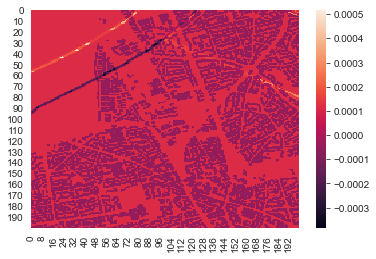

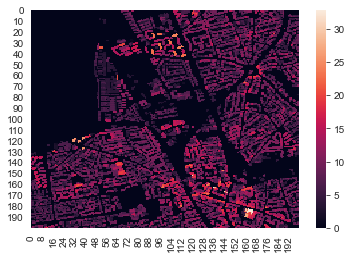

In [34]:
#chained_result = pd.read_csv("../data/chainedresult600-800.csv",sep = ";")
make_heatmap_from_pd(result_dataframe=chained_result,target_name="pred_emission_value_out",hour=27,hour_name="hour(3)")

make_heatmap_from_pd(result_dataframe=chained_result,target_name="building_height",hour=26,hour_name="hour(2)")
